In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib notebook
plt.style.use('seaborn-whitegrid')

In [3]:
def get_data():
    load_path = 'C:/Users/Gagampy/YandexDisk/YandexDisk/Nauch_Rabota/Spiro/Database_csv/'
    load_packages = ['Record_1_features/',
                     #'Record_3_features/',
                     'Record_4_features/',
                     'Record_6_features/',
                     'Record_7_features/',
                     #'Record_8_features/'
                    ]
    patient_indexes = np.array([-1])
    for package_index, package in enumerate(load_packages):
        df = pd.read_csv(load_path + package + 'features_df.csv')
        if package_index > 0:
            df_old = pd.concat([df_old, df], axis=0, ignore_index=True, sort=False)
        else:
            df_old = df
        patient_indexes = np.append(patient_indexes, df_old.index[-1])
    patient_indexes = np.delete(patient_indexes, -1)
    patient_indexes += 1
    return df_old, patient_indexes

df_, pat_indexes = get_data()
df_.tail()

,Spiro_iBeg,Spiro_iEnd,Spiro_obstr_len,Spo_iMax,Spo_iMin,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Prev_spiro_peak_coord,Prev_spiro_min_coord
1413,383010,383435,425,383337,383651,99.29,2862.7,-1618.3,382902,382918
1414,383565,384000,435,383891,384243,99.64,3999.6,-1507.7,383464,383506
1415,385335,385695,360,385626,386124,92.54,4638.3,-1641.7,385239,385253
1416,386330,386740,410,386606,387119,94.02,3459.4,-1273.8,386237,386220
1417,387425,387780,355,387464,387804,50.74,2972.7,-1472.6,387372,387316


In [4]:
pat_indexes

array([  0, 296, 578, 811])

### Feature Engineering

In [5]:
df_['Spiro_peak_to_next_iBeg'] = df_['Spiro_iBeg'] - df_['Prev_spiro_peak_coord'] 
df_['Spiro_peak_to_next_iEnd'] = df_['Spiro_iEnd'] - df_['Prev_spiro_peak_coord']
df_['Peak_range'] = df_['Spiro_peak_ampl'] + df_['Spiro_min_ampl'].abs()

df_.head()

,Spiro_iBeg,Spiro_iEnd,Spiro_obstr_len,Spo_iMax,Spo_iMin,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Prev_spiro_peak_coord,Prev_spiro_min_coord,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range
0,13715,14056,341,13836,14828,134.92,611.34,-1679.3,13550,13568,165,506,2290.64
1,15327,15713,386,15499,15970,122.31,1567.00,-1791.6,15239,15214,88,474,3358.60
2,17017,17448,431,17212,17683,149.60,1423.40,-2492.3,16941,16902,76,507,3915.70
3,17676,17970,294,17814,18720,146.11,2333.50,-2936.6,17540,17513,136,430,5270.10
4,18651,19164,513,18852,19357,120.89,1641.50,-2514.5,18564,18495,87,600,4156.00


In [6]:
def drop_unnecessary_features(df, ftd):
    df.drop(to_drop, axis=1, inplace=True)
    return df

to_drop = ['Spiro_iBeg', 'Spiro_iEnd', 'Prev_spiro_peak_coord',
          'Prev_spiro_min_coord', 'Spo_iMax', 'Spo_iMin']
df = drop_unnecessary_features(df_, to_drop)
df.Spo_decr = df.Spo_decr / 10
df.head()

,Spiro_obstr_len,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range
0,341,13.492,611.34,-1679.3,165,506,2290.64
1,386,12.231,1567.00,-1791.6,88,474,3358.60
2,431,14.960,1423.40,-2492.3,76,507,3915.70
3,294,14.611,2333.50,-2936.6,136,430,5270.10
4,513,12.089,1641.50,-2514.5,87,600,4156.00


In [7]:
del df_

In [8]:
print('Data shape: {}, data without nan shape: {}'.format(df.shape, df.dropna().shape))

Data shape: (1418, 7), data without nan shape: (1418, 7)


### Non-linear features

In [9]:
df.head()

,Spiro_obstr_len,Spo_decr,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range
0,341,13.492,611.34,-1679.3,165,506,2290.64
1,386,12.231,1567.00,-1791.6,88,474,3358.60
2,431,14.960,1423.40,-2492.3,76,507,3915.70
3,294,14.611,2333.50,-2936.6,136,430,5270.10
4,513,12.089,1641.50,-2514.5,87,600,4156.00


### Preprocessing

In [10]:
first_pat = df.loc[:pat_indexes[1]]
second_pat = df.loc[pat_indexes[1]:pat_indexes[2]]
third_pat = df.loc[pat_indexes[2]:pat_indexes[3]]
fourth_pat = df.loc[pat_indexes[3]:]

In [11]:
patient_datas = {}
patient_datas[1] = df.loc[:pat_indexes[1]]
#patient_datas[3] = df.loc[pat_indexes[1]:pat_indexes[2]] 
patient_datas[4] = df.loc[pat_indexes[1]:pat_indexes[2]]
patient_datas[6] = df.loc[pat_indexes[2]:pat_indexes[3]]
patient_datas[7] = df.loc[pat_indexes[3]:]
#patient_datas[8] = df.loc[pat_indexes[5]:]

In [12]:
patient_datas.keys()

dict_keys([1, 4, 6, 7])

In [13]:
# 1 - mumHg. 3 - mumHg, 4 - mumHg. 6 - mumHg. 7 - mumHo. 8 -mumHg
amplitude_coeffs = {1: 0.4114, 3: 1.0320, 4: 0.0823, 6: 1.0320, 7: 0.3030, 8: 0.4114}

In [14]:
for patient_n, data in patient_datas.items():
    if patient_n == 7:
        data.Spiro_peak_ampl.loc[:] = abs((data.Spiro_peak_ampl / amplitude_coeffs[patient_n] * 100) * 0.073556)
    else:
        data.Spiro_peak_ampl.loc[:] = abs(data.Spiro_peak_ampl / amplitude_coeffs[patient_n] * 100)
    data['Obstr_to_prev_peak'] = data.Spiro_peak_ampl / data.Spiro_obstr_len

D:\Programming\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Programming\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Programming\Anaconda\lib\site-packages\

In [15]:
def get_target(df, target_col):
    y = df[target_col]
    df.drop(target_col, axis=1, inplace=True)
    y.index = range(len(y))
    return y, df


patients_xy = {}
for patient_n, data in patient_datas.items():
    y, df = get_target(data, 'Spo_decr')
    patients_xy[patient_n] = {}
    patients_xy[patient_n]['x'] = df
    patients_xy[patient_n]['y'] = y
    

D:\Programming\Anaconda\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

def standart_scale_df(df): 
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df))
    df_scaled.columns = df.columns
    return df_scaled  
    
for data in patients_xy.values():
    data['x'] = standart_scale_df(data['x'])

In [17]:
patients_xy[1]['x'].head()

,Spiro_obstr_len,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range,Obstr_to_prev_peak
0,-1.075052,-0.086579,1.572620,1.421838,-0.746132,-1.927782,-0.956825
1,-0.873431,-0.064297,1.502821,-0.163690,-0.885847,-1.377160,0.426436
2,-0.671811,-0.067645,1.067307,-0.410786,-0.741766,-1.089929,-0.035526
3,-1.285633,-0.046426,0.791156,0.824691,-1.077956,-0.391624,2.792581
4,-0.304414,-0.062560,1.053508,-0.184282,-0.335719,-0.966035,-0.098225


In [18]:
patients_xy[1]['x']['Spiro_peak_ampl'].shift().shape, patients_xy[1]['x']['Spiro_peak_ampl'].shape

((297,), (297,))

In [19]:
for data in patients_xy.values():
    data['x']['Spiro_prev_peak_ampl'] = data['x']['Spiro_peak_ampl'].shift()
    data['x']['Spiro_prev_min_ampl'] = data['x']['Spiro_min_ampl'].shift()

In [20]:
patients_xy[1]['x'].head()

,Spiro_obstr_len,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range,Obstr_to_prev_peak,Spiro_prev_peak_ampl,Spiro_prev_min_ampl
0,-1.075052,-0.086579,1.572620,1.421838,-0.746132,-1.927782,-0.956825,NaN,NaN
1,-0.873431,-0.064297,1.502821,-0.163690,-0.885847,-1.377160,0.426436,-0.086579,1.572620
2,-0.671811,-0.067645,1.067307,-0.410786,-0.741766,-1.089929,-0.035526,-0.064297,1.502821
3,-1.285633,-0.046426,0.791156,0.824691,-1.077956,-0.391624,2.792581,-0.067645,1.067307
4,-0.304414,-0.062560,1.053508,-0.184282,-0.335719,-0.966035,-0.098225,-0.046426,0.791156


In [21]:
def create_nonlinear(d, target=None):
    df = d.copy()
    #y = df[target]
    #df = df.drop([target], axis=1)
    ncols = len(df.columns)
    for col_idx in range(ncols):
        current_series = df.iloc[:,col_idx]
        for next_series_idx in range(col_idx+1, ncols):
            next_series = df.iloc[:, next_series_idx]
            # multiplying
            new_name = str(current_series.name)+'*'+str(next_series.name) 
            df[new_name] = current_series * next_series
            
            # diving
            new_name = str(current_series.name)+'/'+str(next_series.name) 
            df[new_name] = current_series / next_series
            
            # extent
            new_name = str(current_series.name)+'**'+str(next_series.name) 
            df[new_name] = current_series ** next_series
        
        # squaring
        new_name = str(current_series.name) + '**2'
        df[new_name] = current_series ** 2
        
        # cubing
        new_name = str(current_series.name) + '**3'
        df[new_name] = current_series ** 3
        
    #out = pd.concat([y, df], axis=1)
    return df

#df = create_nonlinear(df, 'Spo_decr')
for pat_numb, pat_df in patients_xy.items():
    patients_xy[pat_numb]['x'] = create_nonlinear(pat_df['x'])

In [21]:
# drop NA columns
to_drop = []
for pat_numb, pat_df in patients_xy.items():
    mask = pat_df['x'].isna().sum() > 30
    for col in pat_df['x'].loc[:, mask].columns:
        to_drop.append(col)
to_drop = set(to_drop)

for pat_df in patients_xy.values():
    pat_df['x'] = pat_df['x'].drop(to_drop, axis=1)

In [22]:
def median_fill(df, drop=False):
    if drop:
        return df.dropna()
    return df.fillna(df.median())

for pat_df in patients_xy.values():
    pat_df['x'] = median_fill(pat_df['x']) 
    

In [23]:
patients_xy[1]['x'].head()

,Spiro_obstr_len,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range,Obstr_to_prev_peak,Spiro_prev_peak_ampl,Spiro_prev_min_ampl
0,-1.075052,-0.086579,1.572620,1.421838,-0.746132,-1.927782,-0.956825,-0.060301,-0.006468
1,-0.873431,-0.064297,1.502821,-0.163690,-0.885847,-1.377160,0.426436,-0.086579,1.572620
2,-0.671811,-0.067645,1.067307,-0.410786,-0.741766,-1.089929,-0.035526,-0.064297,1.502821
3,-1.285633,-0.046426,0.791156,0.824691,-1.077956,-0.391624,2.792581,-0.067645,1.067307
4,-0.304414,-0.062560,1.053508,-0.184282,-0.335719,-0.966035,-0.098225,-0.046426,0.791156


### Outliers handling

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [25]:
def pca_to2dim(df):
    pca = PCA(n_components=2)
    return pca.fit_transform(df)


for data in patients_xy.values():
    data['x_pca'] = pca_to2dim(data['x'])

In [26]:
def dbscan_df(df, eps=1, min_samples=2):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df)
    return dbscan


def visul_dbcan_labels(df, dbscan):
    # Black removed and is used for noise instead.
    core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True
    plt.figure()
    unique_labels = set(dbscan.labels_)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (dbscan.labels_ == k)

        xy = df[class_member_mask & core_samples_mask]
        #print(xy)
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

        xy = df[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        
dbscan_objs = {}

<IPython.core.display.Javascript object>


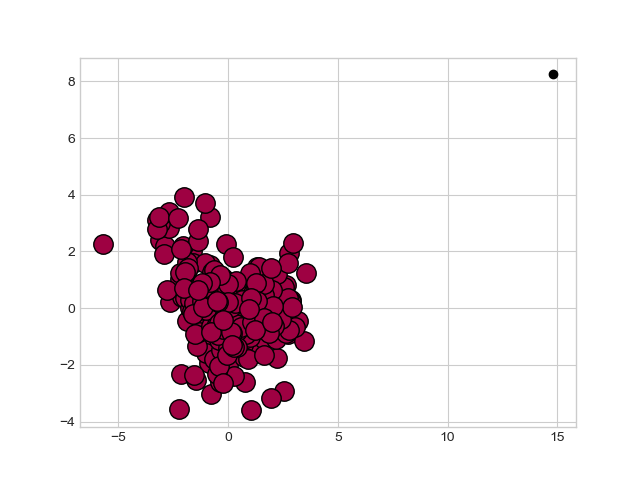

In [27]:
dbscan_objs[1] = dbscan_df(patients_xy[1]['x_pca'], 3, 2)
visul_dbcan_labels(patients_xy[1]['x_pca'], dbscan_objs[1])

In [28]:
"""dbscan_objs[3] = dbscan_df(patients_xy[3]['x_pca'], 1, 2)
visul_dbcan_labels(patients_xy[3]['x_pca'], dbscan_objs[3])"""

"dbscan_objs[3] = dbscan_df(patients_xy[3]['x_pca'], 1, 2)\nvisul_dbcan_labels(patients_xy[3]['x_pca'], dbscan_objs[3])"

<IPython.core.display.Javascript object>


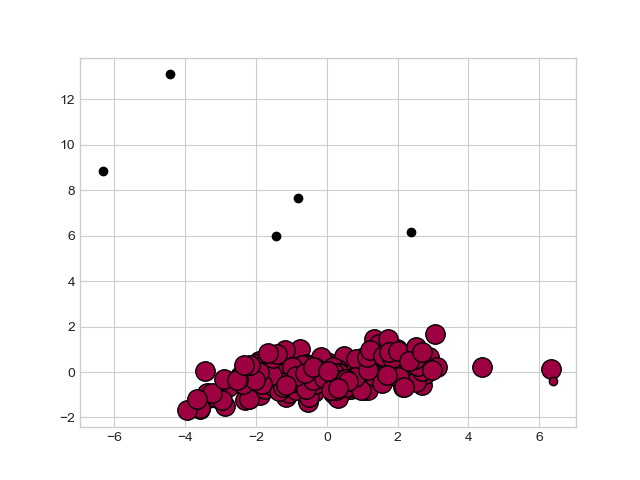

In [30]:
dbscan_objs[4] = dbscan_df(patients_xy[4]['x_pca'], 2, 3)
visul_dbcan_labels(patients_xy[4]['x_pca'], dbscan_objs[4])

<IPython.core.display.Javascript object>


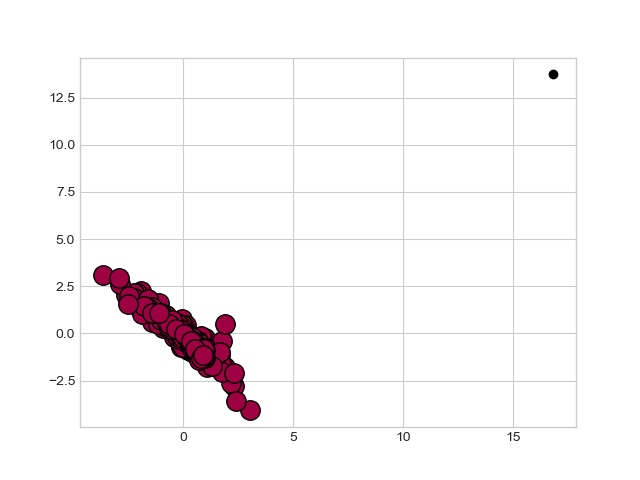

In [31]:
dbscan_objs[6] = dbscan_df(patients_xy[6]['x_pca'], 3, 2)
visul_dbcan_labels(patients_xy[6]['x_pca'], dbscan_objs[6])

<IPython.core.display.Javascript object>


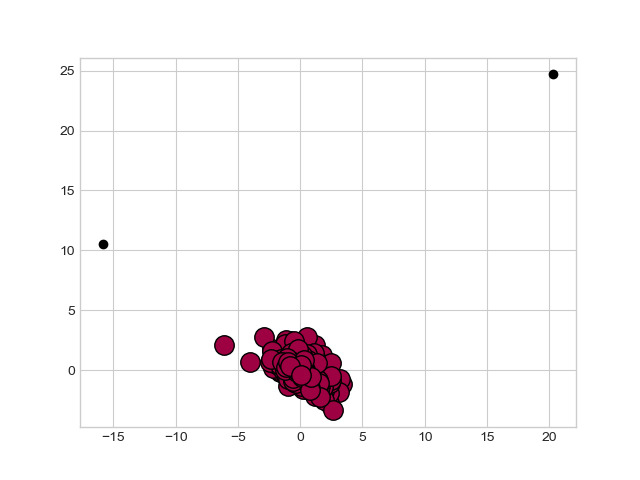

In [32]:
dbscan_objs[7] = dbscan_df(patients_xy[7]['x_pca'], 3, 2)
visul_dbcan_labels(patients_xy[7]['x_pca'], dbscan_objs[7])

In [33]:
"""dbscan_objs[8] = dbscan_df(patients_xy[8]['x_pca'], 0.5, 2)
visul_dbcan_labels(patients_xy[8]['x_pca'], dbscan_objs[8])"""

"dbscan_objs[8] = dbscan_df(patients_xy[8]['x_pca'], 0.5, 2)\nvisul_dbcan_labels(patients_xy[8]['x_pca'], dbscan_objs[8])"

In [33]:
def drop_noise(df, labels):    
    noise_indexes = np.where(labels == -1)[0]
    df_new = df.drop(noise_indexes, axis=0)
    df_new.index = range(0, len(df_new.index))
    return df_new


for patient_n, data in patients_xy.items():
    data['x'] = drop_noise(data['x'], dbscan_objs[patient_n].labels_)
    data['y'] = drop_noise(data['y'], dbscan_objs[patient_n].labels_)

In [34]:
def scale_target(y):
    scaler = StandardScaler()
    y_scaled = pd.DataFrame(scaler.fit_transform(np.reshape(np.array(y),(-1, 1))))
    y_scaled.columns = ['Saturation_duration']
    return y_scaled


for data in patients_xy.values():
    data['y_nscaled'] = scale_target(data['y'])

In [35]:
y_all = pd.DataFrame()
x_all = pd.DataFrame()
y_all_unscaled = pd.DataFrame()
for data in patients_xy.values():
    y_all = pd.concat([y_all, data['y_nscaled']], ignore_index=False)
    y_all_unscaled = pd.concat([y_all_unscaled, data['y']], ignore_index=False)
    x_all = pd.concat([x_all, data['x']], ignore_index=False)
    

In [36]:
y_all.shape, x_all.shape, y_all_unscaled.shape

((1412, 1), (1412, 9), (1412, 1))

### Modelling

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error

In [39]:
def model_gridsearch_evaluation(X, y, model_obj, param_grid, splitter, metric):
    grid_model = GridSearchCV(model_obj, param_grid, scoring=metric, cv=splitter, return_train_score=True, verbose=1)
    grid_model.fit(X, y)
    return grid_model

In [40]:
def grid_search_launching(df, y):
    metric = 'neg_mean_absolute_error'
    splitter = ShuffleSplit(n_splits=5)

    est = GradientBoostingRegressor()
    est_params = {'learning_rate': [0.05, 0.1, 0.2], 
                 'n_estimators': [50, 100, 200, 500]}

    lasso = Lasso()
    lasso_params = {'alpha': [0.5, 1, 1.5, 2]}

    ridge = Ridge()
    ridge_params = {'alpha': [0.5, 1, 1.5, 2]}

    svr = SVR()
    svr_params = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                 'degree': [2, 3, 4],
                 'gamma': ['auto', 'scale']}

    print('Lasso launched!')
    lasso_gs = model_gridsearch_evaluation(df, y, 
                                           lasso, lasso_params, 
                                           splitter, metric)
    print('Ridge launched!')
    ridge_gs = model_gridsearch_evaluation(df, y, 
                                           ridge, ridge_params, 
                                           splitter, metric)
    print('SVR launched!')
    svr_gs = model_gridsearch_evaluation(df, y, 
                                           svr, svr_params, 
                                           splitter, metric)
    print('GBoost launched!')
    est_gs = model_gridsearch_evaluation(df, y, 
                                           est, est_params, 
                                           splitter, metric)
    print('Grid searching completed\n____________________')
    
    return lasso_gs, ridge_gs, svr_gs, est_gs

In [41]:
patients_xy[1].keys()

dict_keys(['x', 'y', 'x_pca', 'y_nscaled'])

In [42]:
lasso_1, ridge_1, svr_1, est_1 = grid_search_launching(patients_xy[1]['x'], patients_xy[1]['y'])
#lasso_3, ridge_3, svr_3, est_3 = grid_search_launching(patients_xy[3]['x'], patients_xy[3]['y'])
lasso_4, ridge_4, svr_4, est_4 = grid_search_launching(patients_xy[4]['x'], patients_xy[4]['y'])
lasso_6, ridge_6, svr_6, est_6 = grid_search_launching(patients_xy[6]['x'], patients_xy[6]['y'])
lasso_7, ridge_7, svr_7, est_7 = grid_search_launching(patients_xy[7]['x'], patients_xy[7]['y'])
#lasso_8, ridge_8, svr_8, est_8 = grid_search_launching(patients_xy[8]['x'], patients_xy[8]['y'])

Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    8.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Grid searching completed
____________________
Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    8.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Grid searching completed
____________________
Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Grid searching completed
____________________
Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Grid searching completed
____________________


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   12.7s finished


In [43]:
lasso_all, ridge_all, svr_all, est_all = grid_search_launching(x_all, y_all_unscaled)

Lasso launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Ridge launched!
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVR launched!
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


GBoost launched!
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   26.5s finished


Grid searching completed
____________________


In [51]:
def print_gs_results(lasso, ridge, svr, est):
    print('Results of grid search: \n Lasso: {}, \n Ridge: {}, \n SVR: {}, \n GBoost: {}.'.format(
        lasso.cv_results_['mean_test_score'],
        ridge.cv_results_['mean_test_score'],
        svr.cv_results_['mean_test_score'],
        est.cv_results_['mean_test_score']))
    
print_gs_results(lasso_1, ridge_1, svr_1, est_1)

Results of grid search: 
 Lasso: [-3.84822917 -3.81293727 -3.94023155 -4.20663482], 
 Ridge: [-4.27399394 -4.22352801 -4.21050925 -4.20576717], 
 SVR: [-3.58893042 -3.43575362 -4.60506396 -3.57029472 -3.61205364 -3.43575362
 -4.60291505 -3.60349854 -3.58893042 -3.43575362 -3.95979506 -3.57029472
 -3.61205364 -3.43575362 -3.91680544 -3.60349854 -3.58893042 -3.43575362
 -4.58323295 -3.57029472 -3.61205364 -3.43575362 -4.55392955 -3.60349854], 
 GBoost: [-3.64381889 -3.71397478 -3.854483   -3.9371613  -3.74322179 -3.85218608
 -4.00341182 -4.0536163  -3.91955383 -3.99296974 -4.06544387 -4.07788501].


In [45]:
#print_gs_results(lasso_3, ridge_3, svr_3, est_3)

In [46]:
print_gs_results(lasso_4, ridge_4, svr_4, est_4)

Results of grid search: 
 Lasso: [-2.69932369 -2.82316814 -2.98467823 -3.14051255], 
 Ridge: [-2.84018977 -2.73132052 -2.68861067 -2.66567394], 
 SVR: [-2.76928056 -2.43684213 -4.58395647 -2.83359163 -2.79904915 -2.43684213
 -4.66858171 -3.46430401 -2.76928056 -2.43684213 -3.43009195 -2.83359163
 -2.79904915 -2.43684213 -3.51788173 -3.46430401 -2.76928056 -2.43684213
 -4.53299136 -2.83359163 -2.79904915 -2.43684213 -4.88586955 -3.46430401], 
 GBoost: [-2.45987022 -2.58393315 -2.62204315 -2.62306963 -2.57968364 -2.67337784
 -2.6523728  -2.65544998 -2.66741372 -2.6734889  -2.70849215 -2.74213649].


In [47]:
print_gs_results(lasso_6, ridge_6, svr_6, est_6)

Results of grid search: 
 Lasso: [-3.48717802 -3.5914457  -3.74685775 -3.95440936], 
 Ridge: [-3.13661096 -3.14245381 -3.15165028 -3.15625676], 
 SVR: [-3.16413154 -3.15576376 -3.91474043 -3.13203641 -3.18676995 -3.15576376
 -3.99093896 -3.16008843 -3.16413154 -3.15576376 -3.31628964 -3.13203641
 -3.18676995 -3.15576376 -3.40494155 -3.16008843 -3.16413154 -3.15576376
 -4.44557159 -3.13203641 -3.18676995 -3.15576376 -4.86610572 -3.16008843], 
 GBoost: [-3.23237858 -3.16773334 -3.08506446 -3.22512845 -3.08542639 -2.98652556
 -3.11454391 -3.17905482 -3.1621458  -3.19942929 -3.20344186 -3.25954261].


In [48]:
print_gs_results(lasso_7, ridge_7, svr_7, est_7)

Results of grid search: 
 Lasso: [-3.30523465 -3.45499354 -3.57105675 -3.57118725], 
 Ridge: [-3.01656293 -3.01171567 -3.01033727 -3.01086356], 
 SVR: [-2.75580662 -3.15320943 -3.54402991 -3.1953231  -2.75909181 -3.15320943
 -3.56095461 -3.27714446 -2.75580662 -3.15320943 -3.77691584 -3.1953231
 -2.75909181 -3.15320943 -4.33937669 -3.27714446 -2.75580662 -3.15320943
 -5.40397408 -3.1953231  -2.75909181 -3.15320943 -8.46008408 -3.27714446], 
 GBoost: [-3.0192322  -2.91830973 -2.86500543 -2.91959861 -2.91464913 -2.88915451
 -2.91604117 -3.00783624 -2.91779189 -2.92112234 -2.96112086 -3.03484559].


In [49]:
#print_gs_results(lasso_8, ridge_8, svr_8, est_8)

In [50]:
print_gs_results(lasso_all, ridge_all, svr_all, est_all)

Results of grid search: 
 Lasso: [-5.5012535  -5.60657939 -5.70250054 -5.81513092], 
 Ridge: [-5.81989635 -5.81974772 -5.81961088 -5.81948459], 
 SVR: [-5.07813434 -5.64612544 -5.79668149 -6.66524597 -5.0310517  -5.64612544
 -5.78651524 -7.65385463 -5.07813434 -5.64612544 -5.82648898 -6.66524597
 -5.0310517  -5.64612544 -5.87400891 -7.65385463 -5.07813434 -5.64612544
 -6.342329   -6.66524597 -5.0310517  -5.64612544 -6.39898153 -7.65385463], 
 GBoost: [-3.95064976 -3.55844379 -3.41245016 -3.37593988 -3.57354397 -3.42751619
 -3.3799777  -3.40184721 -3.51422901 -3.43132878 -3.45812537 -3.54290968].


In [52]:
def get_best_results(results):
    model_min_scores = {}
    for idx, model in enumerate(results):
        model_results_temp = abs(model.cv_results_['mean_test_score'])
        model_min_scores[idx] = [min(model_results_temp), np.argmax(model_results_temp)] 
    return model_min_scores

In [53]:
results_1 = (lasso_1, ridge_1, svr_1, est_1)
min_scores_1 = get_best_results(results_1)
"""
results_3 = (lasso_3, ridge_3, svr_3, est_3)
min_scores_3 = get_best_results(results_3)
"""
results_4 = (lasso_4, ridge_4, svr_4, est_4)
min_scores_4 = get_best_results(results_4)

results_6 = (lasso_6, ridge_6, svr_6, est_6)
min_scores_6 = get_best_results(results_6)

results_7 = (lasso_7, ridge_7, svr_7, est_7)
min_scores_7 = get_best_results(results_7)
"""
results_8 = (lasso_8, ridge_8, svr_8, est_8)
min_scores_8 = get_best_results(results_8)
""" 

'\nresults_8 = (lasso_8, ridge_8, svr_8, est_8)\nmin_scores_8 = get_best_results(results_8)\n'

In [54]:
results_all = (lasso_all, ridge_all, svr_all, est_all)
min_scores_all = get_best_results(results_all)

In [55]:
print('1 : {} \n 4 : {} \n 6 : {} \n 7 : {} \n'.format(min_scores_1, min_scores_4, min_scores_6,min_scores_7))

1 : {0: [3.8129372727413973, 3], 1: [4.205767169109515, 0], 2: [3.4357536176937242, 2], 3: [3.643818885013904, 11]} 
 4 : {0: [2.6993236938391414, 3], 1: [2.665673937515168, 0], 2: [2.436842131969994, 22], 3: [2.4598702241277763, 11]} 
 6 : {0: [3.48717801542783, 3], 1: [3.1366109575705043, 3], 2: [3.132036407407655, 22], 3: [2.986525557515961, 11]} 
 7 : {0: [3.3052346528401753, 3], 1: [3.010337269871508, 0], 2: [2.755806617670715, 22], 3: [2.8650054284609774, 11]} 



In [56]:
svr_best_all = svr_all.best_estimator_
svr_best_all

SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
min_scores_all

{0: [5.501253499155633, 3],
 1: [5.819484593795292, 0],
 2: [5.0310516975262995, 7],
 3: [3.3759398800886244, 0]}

### Visualization

In [58]:
from sklearn.metrics import r2_score

def testing_process(df, y, model, model_type):

    if model_type == 'l':
        model_new = Lasso(**model.best_params_)
    if model_type == 'r':
        model_new = Ridge(**model.best_params_)
    if model_type == 's':
        model_new = SVR(**model.best_params_)
    if model_type == 'gb':
        model_new = GradientBoostingRegressor(**model.best_params_)
    
    predictions = []
    ground_truth = []
    mae = []
    df.index = range(0, df.shape[0])
    y.index = range(0, y.shape[0])
    
    shuffled_data = pd.concat([df, y], axis=1).sample(frac=1)
    test_indexes = int(len(shuffled_data.index)*0.3)
    test_data = shuffled_data.iloc[:test_indexes]
    train_data = shuffled_data.iloc[test_indexes:]
    
    X_train, y_train = split_xy(train_data)
    X_test, y_test = split_xy(test_data)
    """    
    for train_idx, test_idx in ShuffleSplit(n_splits=3).split(df, y):
        X_train = df.loc[train_idx]
        X_test = df.loc[test_idx]
        
        y_train = y.loc[train_idx]
        y_test = y.loc[test_idx]
    """
    model_new.fit(X_train, y_train)
    preds = model_new.predict(X_test)
    predictions.append(preds)
    ground_truth.append(y_test)
    mae.append(mean_absolute_error(preds, y_test))
    return predictions, ground_truth, model_new, mae

In [59]:
def split_xy(df):
    y = df.Spo_decr
    x = df.drop('Spo_decr', axis=1)
    return x, y


def normal_equation_testing(X, y):
    
    shuffled_data = pd.concat([X, y], axis=1).sample(frac=1)
    test_indexes = int(len(shuffled_data.index)*0.3)
    test_data = shuffled_data.iloc[:test_indexes]
    train_data = shuffled_data.iloc[test_indexes:]
    
    X_train, y_train = split_xy(train_data)
    X_test, y_test = split_xy(test_data)
    
    beta_coeffs = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), y_train)
    preds = np.matmul(X_test, beta_coeffs)
    metric = mean_absolute_error(preds, y_test)
    corr = get_correlation(preds, y_test)
    return beta_coeffs, metric, corr, preds, y_test

In [60]:
def get_correlation(gt, preds):
    #gt = np.array(gt).reshape([gt.shape[0], 1])
    preds = np.array(preds).reshape([preds.shape[0], 1])
    return np.corrcoef([np.array(gt), np.array(preds)])

In [61]:
y_all.head()

,Saturation_duration
0,-1.965463
1,-2.150234
2,-1.750361
3,-1.801499
4,-2.171041


In [62]:
pred_all, ground_truth_all, model_all, mae_all = testing_process(x_all, y_all_unscaled, svr_all, 's')

AttributeError: 'DataFrame' object has no attribute 'Spo_decr'

In [63]:
def get_correlation_and_r2(gt, pred, mae):
    
    less_mae_idx = np.argmin(mae)
    new_shape = (pred[less_mae_idx].shape[0], 1)
    a = pd.DataFrame(pred[less_mae_idx].reshape(new_shape))
    b = pd.DataFrame(np.array(gt[less_mae_idx]).reshape(new_shape))
    ccorr = pd.concat([b, a], axis=1).corr()
    r2 = r2_score(b, a)
    return ccorr, r2

In [64]:
d = {}
d[1] = {}
d[4] = {}
d[6] = {}
d[7] = {}
d[0] = {}

In [65]:
patients_xy[1]['x'].head()

,Spiro_obstr_len,Spiro_peak_ampl,Spiro_min_ampl,Spiro_peak_to_next_iBeg,Spiro_peak_to_next_iEnd,Peak_range,Obstr_to_prev_peak,Spiro_prev_peak_ampl,Spiro_prev_min_ampl
0,-1.075052,-0.086579,1.572620,1.421838,-0.746132,-1.927782,-0.956825,-0.060301,-0.006468
1,-0.873431,-0.064297,1.502821,-0.163690,-0.885847,-1.377160,0.426436,-0.086579,1.572620
2,-0.671811,-0.067645,1.067307,-0.410786,-0.741766,-1.089929,-0.035526,-0.064297,1.502821
3,-1.285633,-0.046426,0.791156,0.824691,-1.077956,-0.391624,2.792581,-0.067645,1.067307
4,-0.304414,-0.062560,1.053508,-0.184282,-0.335719,-0.966035,-0.098225,-0.046426,0.791156


In [87]:
pred_1, ground_truth_1, model_1, mae_1 = testing_process(patients_xy[1]['x'], patients_xy[1]['y'], est_1, 'gb')
corr_1, r2_1 = get_correlation_and_r2(ground_truth_1, pred_1, mae_1)

print(corr_1, 'R2:', r2_1, 'Test length:', len(pred_1[0]), 'MAE:', mae_1[0])

d[1]['gb'] = {}
d[1]['gb']['preds'] = list(*pred_1)
d[1]['gb']['gt'] = list(*ground_truth_1)
d[1]['gb']['mae'] = mae_1
d[1]['gb']['corr'] = corr_1.iloc[0, 1]
d[1]['gb']['r2'] = r2_1

fi_dict = {}
fi = model_1.feature_importances_
for i, col in enumerate(patients_xy[1]['x'].columns):
    fi_dict[col] = fi[i]
d[1]['gb']['fi'] = fi_dict

          0         0
0  1.000000  0.706778
0  0.706778  1.000000 R2: 0.4915577131880545 Test length: 88 MAE: 3.614580222756125


In [67]:
pred_1, ground_truth_1, model_1, mae_1 = testing_process(patients_xy[1]['x'], patients_xy[1]['y'], lasso_1, 'l')
corr_1, r2_1 = get_correlation_and_r2(ground_truth_1, pred_1, mae_1)

print(corr_1, 'R2:', r2_1, 'Test length:', len(pred_1[0]), 'MAE:', mae_1[0])

d[1]['lasso'] = {}
d[1]['lasso']['preds'] = list(*pred_1)
d[1]['lasso']['gt'] = list(*ground_truth_1)
d[1]['lasso']['mae'] = mae_1
d[1]['lasso']['corr'] = corr_1.iloc[0, 1]
d[1]['lasso']['r2'] = r2_1

          0         0
0  1.000000  0.524627
0  0.524627  1.000000 R2: 0.22596499403799253 Test length: 88 MAE: 3.83525200736492


In [68]:
pred_1, ground_truth_1, model_1, mae_1 = testing_process(patients_xy[1]['x'], patients_xy[1]['y'], ridge_1, 'r')
corr_1, r2_1 = get_correlation_and_r2(ground_truth_1, pred_1, mae_1)

print(corr_1, 'R2:', r2_1, 'Test length:', len(pred_1[0]), 'MAE:', mae_1[0])

d[1]['ridge'] = {}
d[1]['ridge']['preds'] = list(*pred_1)
d[1]['ridge']['gt'] = list(*ground_truth_1)
d[1]['ridge']['mae'] = mae_1
d[1]['ridge']['corr'] = corr_1.iloc[0, 1]
d[1]['ridge']['r2'] = r2_1

          0         0
0  1.000000  0.562638
0  0.562638  1.000000 R2: 0.2900740154992949 Test length: 88 MAE: 3.937765824404488


In [74]:
pred_1, ground_truth_1, model_1, mae_1 = testing_process(patients_xy[1]['x'], patients_xy[1]['y'], svr_1, 's')
corr_1, r2_1 = get_correlation_and_r2(ground_truth_1, pred_1, mae_1)

print(corr_1, 'R2:', r2_1, 'Test length:', len(pred_1[0]), 'MAE:', mae_1[0])

d[1]['svr'] = {}
d[1]['svr']['preds'] = list(*pred_1)
d[1]['svr']['gt'] = list(*ground_truth_1)
d[1]['svr']['mae'] = mae_1
d[1]['svr']['corr'] = corr_1.iloc[0, 1]
d[1]['svr']['r2'] = r2_1

          0         0
0  1.000000  0.728252
0  0.728252  1.000000 R2: 0.517620067228485 Test length: 88 MAE: 3.2726972833807833


In [75]:
from scipy.stats import shapiro, spearmanr, kstest

In [103]:
spearmanr(pred_1[0], ground_truth_1[0])

SpearmanrResult(correlation=0.7195886002174295, pvalue=2.8205305203472944e-15)

<IPython.core.display.Javascript object>


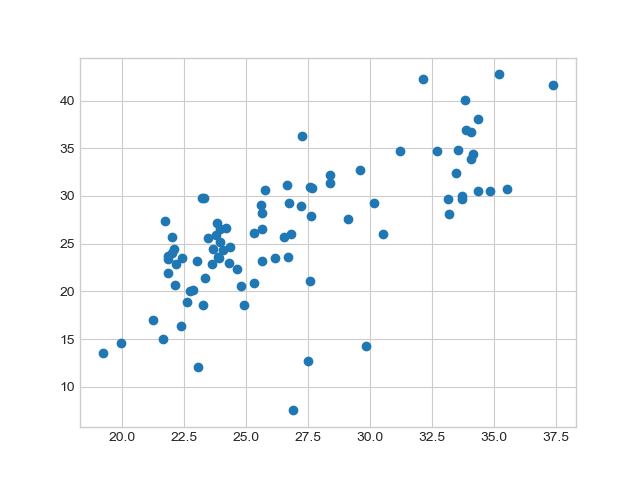

In [88]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_1, ground_truth_1)
#ca.set_xlim(5, 48)
#ca.set_ylim(2, 45)

In [91]:
pred_4, ground_truth_4, model_4, mae_4 = testing_process(patients_xy[4]['x'], patients_xy[4]['y'], lasso_4, 'l')
corr_4, r2_4 = get_correlation_and_r2(ground_truth_4, pred_4, mae_4)

print(corr_4, 'R2:', r2_4, 'Test length:', len(pred_4[0]), 'MAE:', mae_4[0])

d[4]['lasso'] = {}
d[4]['lasso']['preds'] = list(*pred_4)
d[4]['lasso']['gt'] = list(*ground_truth_4)
d[4]['lasso']['mae'] = mae_4
d[4]['lasso']['corr'] = corr_4.iloc[0, 1]
d[4]['lasso']['r2'] = r2_4

          0         0
0  1.000000  0.813421
0  0.813421  1.000000 R2: 0.6575410799382684 Test length: 83 MAE: 2.322681634913924


In [93]:
pred_4, ground_truth_4, model_4, mae_4 = testing_process(patients_xy[4]['x'], patients_xy[4]['y'], ridge_4, 'r')
corr_4, r2_4 = get_correlation_and_r2(ground_truth_4, pred_4, mae_4)

print(corr_4, 'R2:', r2_4, 'Test length:', len(pred_4[0]), 'MAE:', mae_4[0])

d[4]['ridge'] = {}
d[4]['ridge']['preds'] = list(*pred_4)
d[4]['ridge']['gt'] = list(*ground_truth_4)
d[4]['ridge']['mae'] = mae_4
d[4]['ridge']['corr'] = corr_4.iloc[0, 1]
d[4]['ridge']['r2'] = r2_4

          0         0
0  1.000000  0.803891
0  0.803891  1.000000 R2: 0.6350598214210346 Test length: 83 MAE: 2.3425498723061047


In [100]:
pred_4, ground_truth_4, model_4, mae_4 = testing_process(patients_xy[4]['x'], patients_xy[4]['y'], svr_4, 's')
corr_4, r2_4 = get_correlation_and_r2(ground_truth_4, pred_4, mae_4)

print(corr_4, 'R2:', r2_4, 'Test length:', len(pred_4[0]), 'MAE:', mae_4[0])

d[4]['svr'] = {}
d[4]['svr']['preds'] = list(*pred_4)
d[4]['svr']['gt'] = list(*ground_truth_4)
d[4]['svr']['mae'] = mae_4
d[4]['svr']['corr'] = corr_4.iloc[0, 1]
d[4]['svr']['r2'] = r2_4

          0         0
0  1.000000  0.880838
0  0.880838  1.000000 R2: 0.7544358449973912 Test length: 83 MAE: 2.1954551053400895


In [101]:
spearmanr(pred_4[0], ground_truth_4[0])

SpearmanrResult(correlation=0.8344527937534107, pvalue=1.1509376993725603e-22)

In [99]:
pred_4, ground_truth_4, model_4, mae_4 = testing_process(patients_xy[4]['x'], patients_xy[4]['y'], est_4, 'gb')
corr_4, r2_4 = get_correlation_and_r2(ground_truth_4, pred_4, mae_4)

print(corr_4, 'R2:', r2_4, 'Test length:', len(pred_4[0]), 'MAE:', mae_4[0])

d[4]['gb'] = {}
d[4]['gb']['preds'] = list(*pred_4)
d[4]['gb']['gt'] = list(*ground_truth_4)
d[4]['gb']['mae'] = mae_4
d[4]['gb']['corr'] = corr_4.iloc[0, 1]
d[4]['gb']['r2'] = r2_4

fi_dict = {}
fi = model_4.feature_importances_
for i, col in enumerate(patients_xy[4]['x'].columns):
    fi_dict[col] = fi[i]
d[4]['gb']['fi'] = fi_dict

          0         0
0  1.000000  0.783878
0  0.783878  1.000000 R2: 0.6111877368941698 Test length: 83 MAE: 2.7477454171186384


<IPython.core.display.Javascript object>


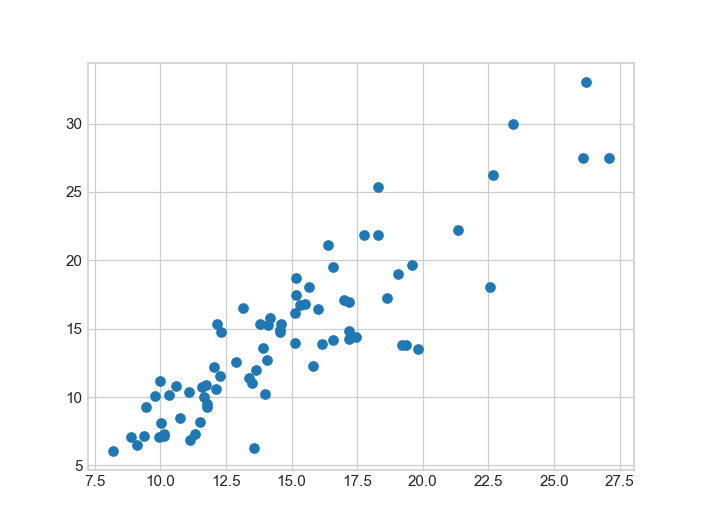

In [183]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_4, ground_truth_4)

In [104]:
pred_6, ground_truth_6, model_6, mae_6 = testing_process(patients_xy[6]['x'], patients_xy[6]['y'], lasso_6, 'l')
corr_6, r2_6 = get_correlation_and_r2(ground_truth_6, pred_6, mae_6)

print(corr_6, 'R2:', r2_6, 'Test length:', len(pred_6[0]), 'MAE:', mae_6[0])

d[6]['lasso'] = {}
d[6]['lasso']['preds'] = list(*pred_6)
d[6]['lasso']['gt'] = list(*ground_truth_6)
d[6]['lasso']['mae'] = mae_6
d[6]['lasso']['corr'] = corr_6.iloc[0, 1]
d[6]['lasso']['r2'] = r2_6

         0        0
0  1.00000  0.49864
0  0.49864  1.00000 R2: 0.21856485404027304 Test length: 69 MAE: 3.6151371372427916


In [148]:
pred_6, ground_truth_6, model_6, mae_6 = testing_process(patients_xy[6]['x'], patients_xy[6]['y'], ridge_6, 'r')
corr_6, r2_6 = get_correlation_and_r2(ground_truth_6, pred_6, mae_6)

print(corr_6, 'R2:', r2_6, 'Test length:', len(pred_6[0]), 'MAE:', mae_6[0])

d[6]['ridge'] = {}
d[6]['ridge']['preds'] = list(*pred_6)
d[6]['ridge']['gt'] = list(*ground_truth_6)
d[6]['ridge']['mae'] = mae_6
d[6]['ridge']['corr'] = corr_6.iloc[0, 1]
d[6]['ridge']['r2'] = r2_6

          0         0
0  1.000000  0.339067
0  0.339067  1.000000 R2: -0.11213984990671144 Test length: 69 MAE: 3.368668234359146


In [149]:
spearmanr(pred_6[0], ground_truth_6[0])

SpearmanrResult(correlation=0.3058458165875046, pvalue=0.010597665221739631)

In [113]:
pred_6, ground_truth_6, model_6, mae_6 = testing_process(patients_xy[6]['x'], patients_xy[6]['y'], est_6, 'gb')
corr_6, r2_6 = get_correlation_and_r2(ground_truth_6, pred_6, mae_6)

print(corr_6, r2_6, len(pred_6[0]))

d[6]['gb'] = {}
d[6]['gb']['preds'] = list(*pred_6)
d[6]['gb']['gt'] = list(*ground_truth_6)
d[6]['gb']['mae'] = mae_6
d[6]['gb']['corr'] = corr_6.iloc[0, 1]
d[6]['gb']['r2'] = r2_6

fi_dict = {}
fi = model_6.feature_importances_
for i, col in enumerate(patients_xy[6]['x'].columns):
    fi_dict[col] = fi[i]
d[6]['gb']['fi'] = fi_dict

          0         0
0  1.000000  0.643029
0  0.643029  1.000000 0.3913434975241109 69


In [229]:
mae_6[0]

3.2499599184149273

In [116]:
pred_6, ground_truth_6, model_6, mae_6 = testing_process(patients_xy[6]['x'], patients_xy[6]['y'], svr_6, 's')
corr_6, r2_6 = get_correlation_and_r2(ground_truth_6, pred_6, mae_6)

print(corr_6, 'R2:', r2_6, 'Test length:', len(pred_6[0]), 'MAE:', mae_6[0])

d[6]['svr'] = {}
d[6]['svr']['preds'] = list(*pred_6)
d[6]['svr']['gt'] = list(*ground_truth_6)
d[6]['svr']['mae'] = mae_6
d[6]['svr']['corr'] = corr_6.iloc[0, 1]
d[6]['svr']['r2'] = r2_6

          0         0
0  1.000000  0.720607
0  0.720607  1.000000 R2: 0.3774049813604373 Test length: 69 MAE: 3.392748383779384


<IPython.core.display.Javascript object>


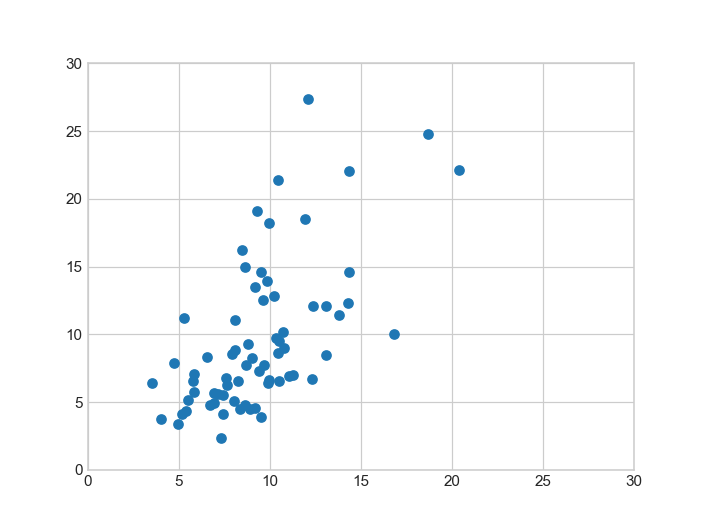

(0, 30)

In [230]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_6, ground_truth_6)
ca.set_xlim(0, 30)
ca.set_ylim(0, 30)

In [161]:
pred_7, ground_truth_7, model_7, mae_7 = testing_process(patients_xy[7]['x'], patients_xy[7]['y'], est_7, 'gb')
corr_7, r2_7 = get_correlation_and_r2(ground_truth_7, pred_7, mae_7)

print(corr_7, r2_7, len(pred_7[0]), mae_7[0])

d[7]['gb'] = {}
d[7]['gb']['preds'] = list(*pred_7)
d[7]['gb']['gt'] = list(*ground_truth_7)
d[7]['gb']['mae'] = mae_7
d[7]['gb']['corr'] = corr_7.iloc[0, 1]
d[7]['gb']['r2'] = r2_7

fi_dict = {}
fi = model_7.feature_importances_
for i, col in enumerate(patients_xy[7]['x'].columns):
    fi_dict[col] = fi[i]
d[7]['gb']['fi'] = fi_dict

          0         0
0  1.000000  0.539651
0  0.539651  1.000000 0.2886712008873531 181 2.9647858348852165


In [162]:
spearmanr(pred_7[0], ground_truth_7[0])

SpearmanrResult(correlation=0.5545365362033657, pvalue=5.5296268141969e-16)

In [250]:
pred_7, ground_truth_7, model_7, mae_7 = testing_process(patients_xy[7]['x'], patients_xy[7]['y'], svr_7, 's')
corr_7, r2_7 = get_correlation_and_r2(ground_truth_7, pred_7, mae_7)

print(corr_7, r2_7, len(pred_7[0]), mae_7[0])

d[7]['svr'] = {}
d[7]['svr']['preds'] = list(*pred_7)
d[7]['svr']['gt'] = list(*ground_truth_7)
d[7]['svr']['mae'] = mae_7
d[7]['svr']['corr'] = corr_7.iloc[0, 1]
d[7]['svr']['r2'] = r2_7

          0         0
0  1.000000  0.271014
0  0.271014  1.000000 -2.3147898352495906 174 3.7498963902331615


<IPython.core.display.Javascript object>


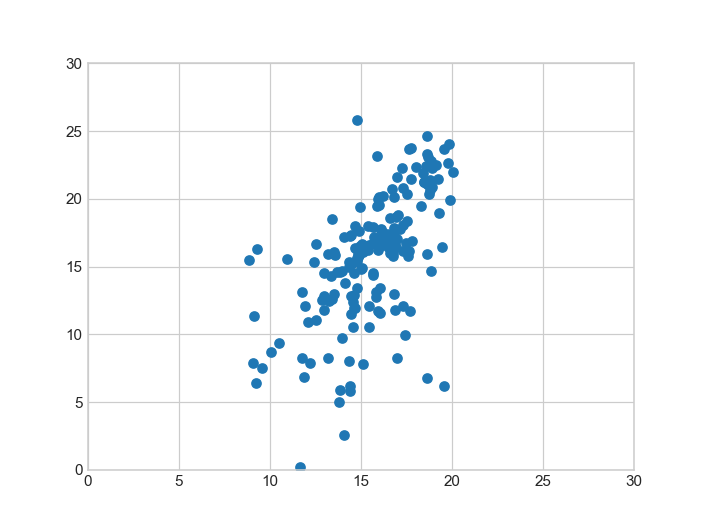

(0, 30)

In [286]:
plt.figure()
ca = plt.gca()
ca.scatter(pred_7, ground_truth_7)
ca.set_xlim(0, 30)
ca.set_ylim(0, 30)

In [164]:
y_all_unscaled.columns = ['Spo_decr']

In [168]:
pred_0, ground_truth_0, model_0, mae_0 = testing_process(x_all, y_all_unscaled, svr_all, 's')
corr_0, r2_0 = get_correlation_and_r2(ground_truth_0, pred_0, mae_0)

print(corr_0, r2_0, len(pred_0[0]))

d[0]['svr'] = {}
d[0]['svr']['preds'] = list(*pred_0)
d[0]['svr']['gt'] = list(*ground_truth_0)
d[0]['svr']['mae'] = mae_0
d[0]['svr']['corr'] = corr_0.iloc[0, 1]
d[0]['svr']['r2'] = r2_0


          0         0
0  1.000000  0.523767
0  0.523767  1.000000 0.2494817335979801 423


In [174]:
pred_0, ground_truth_0, model_0, mae_0 = testing_process(x_all, y_all_unscaled, est_all, 'gb')
corr_0, r2_0 = get_correlation_and_r2(ground_truth_0, pred_0, mae_0)

print(corr_0, r2_0, len(pred_0[0]))

d[0]['gb'] = {}
d[0]['gb']['preds'] = list(*pred_0)
d[0]['gb']['gt'] = list(*ground_truth_0)
d[0]['gb']['mae'] = mae_0
d[0]['gb']['corr'] = corr_0.iloc[0, 1]
d[0]['gb']['r2'] = r2_0

fi_dict = {}
fi = model_0.feature_importances_
for i, col in enumerate(patients_xy[1]['x'].columns):
    fi_dict[col] = fi[i]
d[0]['gb']['fi'] = fi_dict

          0         0
0  1.000000  0.789063
0  0.789063  1.000000 0.6199705616128159 423


In [100]:
import json

In [101]:
with open('results_nonlinear_modelling_3.json', 'w') as fp:
    json.dump(d, fp)

In [93]:
with open('results_nonlinear_modelling_3.json', 'r') as fp:
    s = json.load(fp)


In [95]:
first = s['1']
fourth = s['4']
sixth = s['6']
seventh = s['7']

In [98]:
first['gb'].keys()

dict_keys(['preds', 'gt', 'mae', 'corr', 'r2', 'fi'])

<IPython.core.display.Javascript object>


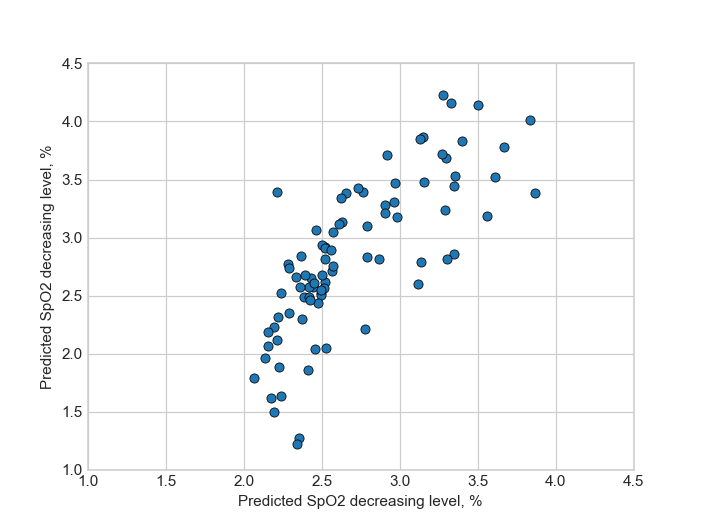

(1, 4.5)

In [115]:
plt.figure()
plt.scatter(np.array(first['gb']['preds'])/10, np.array(first['gb']['gt'])/10, edgecolors='k', linewidth=0.5)
ca = plt.gca()
plt.xlabel('Predicted SpO2 decreasing level, %')
plt.ylabel('Predicted SpO2 decreasing level, %')
ca.set_xlim(1, 4.5)
ca.set_ylim(1, 4.5)

<IPython.core.display.Javascript object>


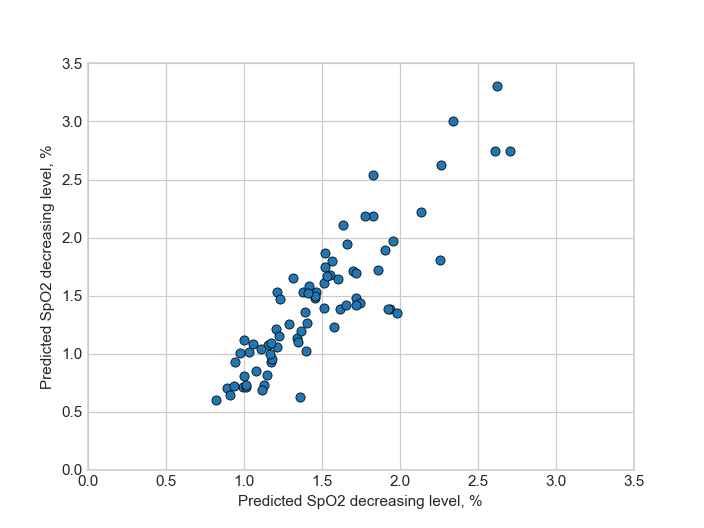

(0, 3.5)

In [118]:
plt.figure()
plt.scatter(np.array(fourth['gb']['preds'])/10, np.array(fourth['gb']['gt'])/10, edgecolors='k', linewidth=0.5)
ca = plt.gca()
plt.xlabel('Predicted SpO2 decreasing level, %')
plt.ylabel('Predicted SpO2 decreasing level, %')
ca.set_xlim(0, 3.5)
ca.set_ylim(0, 3.5)

<IPython.core.display.Javascript object>


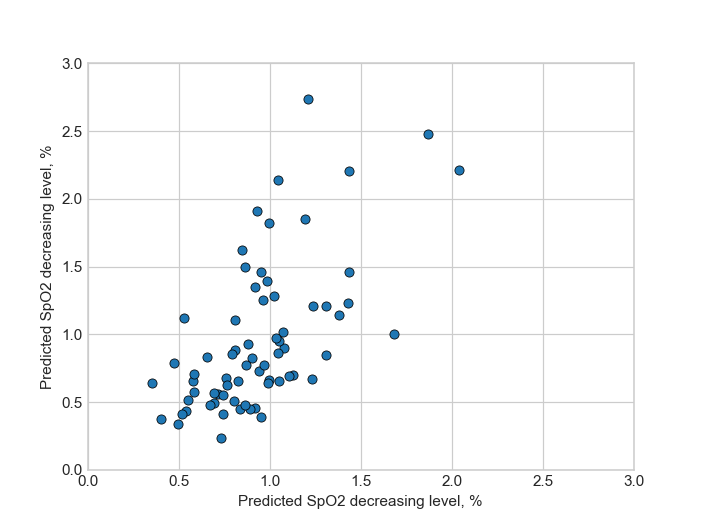

(0, 3)

In [120]:
plt.figure()
plt.scatter(np.array(sixth['gb']['preds'])/10, np.array(sixth['gb']['gt'])/10, edgecolors='k', linewidth=0.5)
ca = plt.gca()
plt.xlabel('Predicted SpO2 decreasing level, %')
plt.ylabel('Predicted SpO2 decreasing level, %')
ca.set_xlim(0, 3)
ca.set_ylim(0, 3)

<IPython.core.display.Javascript object>


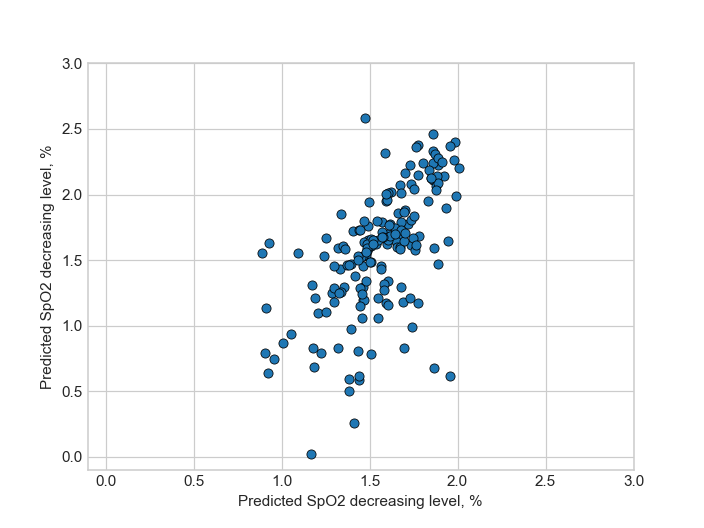

(-0.1, 3)

In [122]:
plt.figure()
plt.scatter(np.array(seventh['gb']['preds'])/10, np.array(seventh['gb']['gt'])/10, edgecolors='k', linewidth=0.5)
ca = plt.gca()
plt.xlabel('Predicted SpO2 decreasing level, %')
plt.ylabel('Predicted SpO2 decreasing level, %')
ca.set_xlim(-0.1, 3)
ca.set_ylim(-0.1, 3)

In [38]:
from keras import models 
from keras import layers
from keras import optimizers
from keras import regularizers

Using TensorFlow backend.


In [39]:
def evaluate_model(model, X, y, splitter, n_epochs):
       
    all_mae_histories = []
    all_mae_histories_val = []
    ground_truth = []
    predictions = []
    
    shuffled_data = pd.concat([X, y], axis=1).sample(frac=1)
    test_indexes = int(len(shuffled_data.index)*0.3)
    test_data = shuffled_data.iloc[:test_indexes]
    train_data = shuffled_data.iloc[test_indexes:]
    
    X_train, y_train = split_xy(train_data)
    X_test, y_test = split_xy(test_data)
    print('Train data shape:{}, Test data shape:{}'.format(X_train.shape, X_test.shape))

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=n_epochs, verbose=1, batch_size=1)

    ground_truth.append(y_test)
    preds = model.predict(X_test)
    predictions.append(preds)

    mae_history = history.history['mean_absolute_error']
    mea_history_val = mean_absolute_error(preds, y_test)

    all_mae_histories.append(mae_history)
    all_mae_histories_val.append(mea_history_val)
           
    average_mae_history = [
                np.mean([x[i] for x in all_mae_histories]) for i in range(n_epochs)]
    
    average_mae_history_val = [
                np.mean([x for x in all_mae_histories_val]) for i in range(n_epochs)]
    
    return model, average_mae_history, average_mae_history_val, ground_truth, predictions

n_features = len(x_all.columns)

In [ ]:
path_to_save = 'C:/Users/Gagampy/YandexDisk/YandexDisk/Nauch_Rabota/Spiro/Database_csv/EDA_output/'
x_all.to_csv(path_to_save + 'x_all.csv')
y_all.to_csv(path_to_save + 'y_all.csv')
y_all_unscaled.to_csv(path_to_save + 'y_unscaled.csv')

In [46]:
data['x'].shape

(583, 99)

In [50]:
model_f = models.Sequential()
model_f.add(layers.Dense(50, activation='relu',
                       input_shape=(99,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(10, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.005, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_1, mae_avrg_f_1, mae_avrg_val_f_1, gt_1, preds_1 = evaluate_model(model_f, 
                                                                          patients_xy[1]['x'], 
                                                                          patients_xy[1]['y'], 
                                                                          splitter, 4000)

Train data shape:(203, 99), Test data shape:(87, 99)
Train on 203 samples, validate on 87 samples
Epoch 1/4000
203/203 [==============================] - 1s 4ms/step - loss: 917.6995 - mean_absolute_error: 19.3431 - val_loss: 549.1231 - val_mean_absolute_error: 18.4049
Epoch 2/4000
203/203 [==============================] - 0s 2ms/step - loss: 486.8134 - mean_absolute_error: 15.5568 - val_loss: 563.6532 - val_mean_absolute_error: 17.6614
Epoch 3/4000
203/203 [==============================] - 0s 2ms/step - loss: 303.1166 - mean_absolute_error: 13.6802 - val_loss: 568.5436 - val_mean_absolute_error: 17.0694
Epoch 4/4000
203/203 [==============================] - 0s 2ms/step - loss: 282.5853 - mean_absolute_error: 13.2560 - val_loss: 562.3621 - val_mean_absolute_error: 16.7905
Epoch 5/4000
203/203 [==============================] - 0s 2ms/step - loss: 281.5582 - mean_absolute_error: 12.8736 - val_loss: 580.0362 - val_mean_absolute_error: 16.3806
Epoch 6/4000
203/203 [====================

Epoch 48/4000
203/203 [==============================] - 0s 2ms/step - loss: 96.8587 - mean_absolute_error: 8.1076 - val_loss: 672.5614 - val_mean_absolute_error: 13.7155
Epoch 49/4000
203/203 [==============================] - 0s 2ms/step - loss: 128.0551 - mean_absolute_error: 8.7528 - val_loss: 678.9762 - val_mean_absolute_error: 13.7255
Epoch 50/4000
203/203 [==============================] - 0s 2ms/step - loss: 106.6135 - mean_absolute_error: 8.3878 - val_loss: 676.1133 - val_mean_absolute_error: 13.6829
Epoch 51/4000
203/203 [==============================] - 0s 2ms/step - loss: 108.9722 - mean_absolute_error: 8.5769 - val_loss: 679.7470 - val_mean_absolute_error: 13.6451
Epoch 52/4000
203/203 [==============================] - 0s 2ms/step - loss: 107.6328 - mean_absolute_error: 8.3347 - val_loss: 676.5776 - val_mean_absolute_error: 13.6095
Epoch 53/4000
203/203 [==============================] - 0s 2ms/step - loss: 145.0473 - mean_absolute_error: 8.7439 - val_loss: 672.6254 - va

Epoch 96/4000
203/203 [==============================] - 0s 2ms/step - loss: 83.0330 - mean_absolute_error: 7.3926 - val_loss: 656.9412 - val_mean_absolute_error: 12.6963
Epoch 97/4000
203/203 [==============================] - 0s 2ms/step - loss: 119.2894 - mean_absolute_error: 7.6977 - val_loss: 656.1334 - val_mean_absolute_error: 12.6726
Epoch 98/4000
203/203 [==============================] - 0s 2ms/step - loss: 111.2745 - mean_absolute_error: 7.6730 - val_loss: 657.2260 - val_mean_absolute_error: 12.6644
Epoch 99/4000
203/203 [==============================] - 0s 2ms/step - loss: 117.6272 - mean_absolute_error: 7.6805 - val_loss: 657.7513 - val_mean_absolute_error: 12.6441
Epoch 100/4000
203/203 [==============================] - 0s 2ms/step - loss: 102.9199 - mean_absolute_error: 7.6175 - val_loss: 658.3598 - val_mean_absolute_error: 12.6122
Epoch 101/4000
203/203 [==============================] - 0s 2ms/step - loss: 79.5844 - mean_absolute_error: 7.2496 - val_loss: 658.6400 - v

Epoch 191/4000
203/203 [==============================] - 0s 2ms/step - loss: 137.3812 - mean_absolute_error: 6.9212 - val_loss: 590.9456 - val_mean_absolute_error: 11.7799
Epoch 192/4000
203/203 [==============================] - 0s 2ms/step - loss: 128.6668 - mean_absolute_error: 7.1585 - val_loss: 583.0740 - val_mean_absolute_error: 11.7682
Epoch 193/4000
203/203 [==============================] - 0s 2ms/step - loss: 63.0221 - mean_absolute_error: 6.4388 - val_loss: 582.3537 - val_mean_absolute_error: 11.7412
Epoch 194/4000
203/203 [==============================] - 0s 2ms/step - loss: 65.9440 - mean_absolute_error: 6.4633 - val_loss: 580.1226 - val_mean_absolute_error: 11.7466
Epoch 195/4000
203/203 [==============================] - 0s 2ms/step - loss: 57.8041 - mean_absolute_error: 6.0059 - val_loss: 581.2062 - val_mean_absolute_error: 11.7468
Epoch 196/4000
203/203 [==============================] - 0s 2ms/step - loss: 55.6251 - mean_absolute_error: 6.0380 - val_loss: 580.9057 -

Epoch 286/4000
203/203 [==============================] - 0s 2ms/step - loss: 49.2513 - mean_absolute_error: 5.7137 - val_loss: 568.1173 - val_mean_absolute_error: 11.3512
Epoch 287/4000
203/203 [==============================] - 0s 2ms/step - loss: 56.0619 - mean_absolute_error: 5.8623 - val_loss: 568.2354 - val_mean_absolute_error: 11.3343
Epoch 288/4000
203/203 [==============================] - 0s 2ms/step - loss: 57.0416 - mean_absolute_error: 6.1583 - val_loss: 567.0336 - val_mean_absolute_error: 11.3246
Epoch 289/4000
203/203 [==============================] - 0s 2ms/step - loss: 57.0106 - mean_absolute_error: 5.9311 - val_loss: 566.1885 - val_mean_absolute_error: 11.3150
Epoch 290/4000
203/203 [==============================] - 0s 2ms/step - loss: 109.1250 - mean_absolute_error: 6.0598 - val_loss: 569.7566 - val_mean_absolute_error: 11.3122
Epoch 291/4000
203/203 [==============================] - 0s 2ms/step - loss: 239.9838 - mean_absolute_error: 6.9839 - val_loss: 564.5464 -

Epoch 381/4000
203/203 [==============================] - 0s 2ms/step - loss: 49.3127 - mean_absolute_error: 5.3301 - val_loss: 539.1713 - val_mean_absolute_error: 10.9313
Epoch 382/4000
203/203 [==============================] - 0s 2ms/step - loss: 79.1873 - mean_absolute_error: 5.8795 - val_loss: 537.7204 - val_mean_absolute_error: 10.9221
Epoch 383/4000
203/203 [==============================] - 0s 2ms/step - loss: 51.6865 - mean_absolute_error: 5.7554 - val_loss: 536.2143 - val_mean_absolute_error: 10.9028
Epoch 384/4000
203/203 [==============================] - 0s 2ms/step - loss: 57.3188 - mean_absolute_error: 5.3920 - val_loss: 535.2128 - val_mean_absolute_error: 10.9083
Epoch 385/4000
203/203 [==============================] - 0s 2ms/step - loss: 48.7815 - mean_absolute_error: 5.6235 - val_loss: 535.1156 - val_mean_absolute_error: 10.9021
Epoch 386/4000
203/203 [==============================] - 0s 2ms/step - loss: 65.5228 - mean_absolute_error: 5.5320 - val_loss: 533.5377 - v

Epoch 476/4000
203/203 [==============================] - 0s 2ms/step - loss: 73.5088 - mean_absolute_error: 5.8896 - val_loss: 507.6199 - val_mean_absolute_error: 10.6596
Epoch 477/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.7199 - mean_absolute_error: 4.8585 - val_loss: 506.4340 - val_mean_absolute_error: 10.6609
Epoch 478/4000
203/203 [==============================] - 0s 2ms/step - loss: 54.3411 - mean_absolute_error: 5.5319 - val_loss: 507.1152 - val_mean_absolute_error: 10.6675
Epoch 479/4000
203/203 [==============================] - 0s 2ms/step - loss: 138.6938 - mean_absolute_error: 5.5982 - val_loss: 510.6389 - val_mean_absolute_error: 10.6687
Epoch 480/4000
203/203 [==============================] - 0s 2ms/step - loss: 43.0679 - mean_absolute_error: 5.3169 - val_loss: 510.9562 - val_mean_absolute_error: 10.6733
Epoch 481/4000
203/203 [==============================] - 0s 2ms/step - loss: 55.3168 - mean_absolute_error: 5.1752 - val_loss: 511.0529 - 

Epoch 571/4000
203/203 [==============================] - 0s 2ms/step - loss: 49.3549 - mean_absolute_error: 4.8088 - val_loss: 479.3590 - val_mean_absolute_error: 10.4202
Epoch 572/4000
203/203 [==============================] - 0s 2ms/step - loss: 71.2908 - mean_absolute_error: 5.5414 - val_loss: 477.6919 - val_mean_absolute_error: 10.4150
Epoch 573/4000
203/203 [==============================] - 0s 2ms/step - loss: 89.1715 - mean_absolute_error: 5.5217 - val_loss: 475.3067 - val_mean_absolute_error: 10.4085
Epoch 574/4000
203/203 [==============================] - 0s 2ms/step - loss: 44.2438 - mean_absolute_error: 4.8718 - val_loss: 475.8128 - val_mean_absolute_error: 10.4057
Epoch 575/4000
203/203 [==============================] - 0s 2ms/step - loss: 43.1864 - mean_absolute_error: 4.9058 - val_loss: 473.6362 - val_mean_absolute_error: 10.3876
Epoch 576/4000
203/203 [==============================] - 0s 2ms/step - loss: 50.7196 - mean_absolute_error: 5.3018 - val_loss: 474.6263 - v

203/203 [==============================] - 0s 2ms/step - loss: 38.2415 - mean_absolute_error: 4.8367 - val_loss: 458.2987 - val_mean_absolute_error: 10.2334
Epoch 666/4000
203/203 [==============================] - 0s 2ms/step - loss: 111.9277 - mean_absolute_error: 5.5335 - val_loss: 459.5512 - val_mean_absolute_error: 10.2283
Epoch 667/4000
203/203 [==============================] - 0s 2ms/step - loss: 40.8416 - mean_absolute_error: 4.7513 - val_loss: 460.0746 - val_mean_absolute_error: 10.2263
Epoch 668/4000
203/203 [==============================] - 0s 2ms/step - loss: 34.7374 - mean_absolute_error: 4.7815 - val_loss: 458.4223 - val_mean_absolute_error: 10.2272
Epoch 669/4000
203/203 [==============================] - 0s 2ms/step - loss: 77.9462 - mean_absolute_error: 5.3926 - val_loss: 458.5843 - val_mean_absolute_error: 10.2205
Epoch 670/4000
203/203 [==============================] - 0s 2ms/step - loss: 40.6646 - mean_absolute_error: 4.7903 - val_loss: 457.7021 - val_mean_absolu

Epoch 713/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.0243 - mean_absolute_error: 4.6673 - val_loss: 444.6406 - val_mean_absolute_error: 10.1546
Epoch 714/4000
203/203 [==============================] - 0s 2ms/step - loss: 39.2886 - mean_absolute_error: 4.8182 - val_loss: 443.2101 - val_mean_absolute_error: 10.1526
Epoch 715/4000
203/203 [==============================] - 0s 2ms/step - loss: 38.2101 - mean_absolute_error: 4.7519 - val_loss: 441.8276 - val_mean_absolute_error: 10.1453
Epoch 716/4000
203/203 [==============================] - 0s 2ms/step - loss: 31.7860 - mean_absolute_error: 4.5430 - val_loss: 440.7114 - val_mean_absolute_error: 10.1376
Epoch 717/4000
203/203 [==============================] - 0s 2ms/step - loss: 47.1666 - mean_absolute_error: 4.8166 - val_loss: 439.6676 - val_mean_absolute_error: 10.1419
Epoch 718/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.1558 - mean_absolute_error: 4.6961 - val_loss: 440.1989 - v

203/203 [==============================] - 0s 2ms/step - loss: 43.8741 - mean_absolute_error: 4.8277 - val_loss: 431.2367 - val_mean_absolute_error: 10.0228
Epoch 808/4000
203/203 [==============================] - 0s 2ms/step - loss: 36.8981 - mean_absolute_error: 4.5761 - val_loss: 431.1085 - val_mean_absolute_error: 10.0177
Epoch 809/4000
203/203 [==============================] - 0s 2ms/step - loss: 42.1252 - mean_absolute_error: 4.8597 - val_loss: 429.4620 - val_mean_absolute_error: 10.0153
Epoch 810/4000
203/203 [==============================] - 0s 2ms/step - loss: 33.7551 - mean_absolute_error: 4.7169 - val_loss: 427.9374 - val_mean_absolute_error: 10.0116
Epoch 811/4000
203/203 [==============================] - 0s 2ms/step - loss: 32.5980 - mean_absolute_error: 4.4862 - val_loss: 426.9807 - val_mean_absolute_error: 10.0094
Epoch 812/4000
203/203 [==============================] - 0s 2ms/step - loss: 32.5032 - mean_absolute_error: 4.4902 - val_loss: 427.2079 - val_mean_absolut

Epoch 855/4000
203/203 [==============================] - 0s 2ms/step - loss: 33.4648 - mean_absolute_error: 4.7660 - val_loss: 425.7155 - val_mean_absolute_error: 9.9600
Epoch 856/4000
203/203 [==============================] - 0s 2ms/step - loss: 29.7114 - mean_absolute_error: 4.2542 - val_loss: 425.8219 - val_mean_absolute_error: 9.9557
Epoch 857/4000
203/203 [==============================] - 0s 2ms/step - loss: 41.5945 - mean_absolute_error: 4.8389 - val_loss: 426.0571 - val_mean_absolute_error: 9.9474
Epoch 858/4000
203/203 [==============================] - 0s 2ms/step - loss: 30.4422 - mean_absolute_error: 4.4489 - val_loss: 426.3468 - val_mean_absolute_error: 9.9447
Epoch 859/4000
203/203 [==============================] - 0s 2ms/step - loss: 34.3712 - mean_absolute_error: 4.3598 - val_loss: 426.4667 - val_mean_absolute_error: 9.9446
Epoch 860/4000
203/203 [==============================] - 0s 2ms/step - loss: 55.6572 - mean_absolute_error: 4.7594 - val_loss: 425.5716 - val_me

Epoch 903/4000
203/203 [==============================] - 0s 2ms/step - loss: 41.6907 - mean_absolute_error: 4.6052 - val_loss: 409.1165 - val_mean_absolute_error: 9.9101
Epoch 904/4000
203/203 [==============================] - 0s 2ms/step - loss: 46.6619 - mean_absolute_error: 4.7104 - val_loss: 407.2884 - val_mean_absolute_error: 9.9044
Epoch 905/4000
203/203 [==============================] - 0s 2ms/step - loss: 30.6206 - mean_absolute_error: 4.4533 - val_loss: 407.9810 - val_mean_absolute_error: 9.9085
Epoch 906/4000
203/203 [==============================] - 0s 2ms/step - loss: 28.5223 - mean_absolute_error: 4.2750 - val_loss: 409.4693 - val_mean_absolute_error: 9.9040
Epoch 907/4000
203/203 [==============================] - 0s 2ms/step - loss: 34.0735 - mean_absolute_error: 4.6178 - val_loss: 411.1922 - val_mean_absolute_error: 9.9176
Epoch 908/4000
203/203 [==============================] - 0s 2ms/step - loss: 30.2460 - mean_absolute_error: 4.3106 - val_loss: 411.4447 - val_me

Epoch 951/4000
203/203 [==============================] - 0s 2ms/step - loss: 91.5630 - mean_absolute_error: 5.0489 - val_loss: 405.3972 - val_mean_absolute_error: 9.8861
Epoch 952/4000
203/203 [==============================] - 0s 2ms/step - loss: 39.8966 - mean_absolute_error: 4.5115 - val_loss: 406.7689 - val_mean_absolute_error: 9.8793
Epoch 953/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.2734 - mean_absolute_error: 4.1871 - val_loss: 405.3197 - val_mean_absolute_error: 9.8795
Epoch 954/4000
203/203 [==============================] - 0s 2ms/step - loss: 32.0237 - mean_absolute_error: 4.3323 - val_loss: 406.5188 - val_mean_absolute_error: 9.8828
Epoch 955/4000
203/203 [==============================] - 0s 2ms/step - loss: 35.6578 - mean_absolute_error: 4.4034 - val_loss: 406.1249 - val_mean_absolute_error: 9.8791
Epoch 956/4000
203/203 [==============================] - 0s 2ms/step - loss: 89.6414 - mean_absolute_error: 4.5672 - val_loss: 405.0629 - val_me

Epoch 999/4000
203/203 [==============================] - 0s 2ms/step - loss: 43.1257 - mean_absolute_error: 4.5516 - val_loss: 403.3509 - val_mean_absolute_error: 9.8299
Epoch 1000/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.2012 - mean_absolute_error: 4.6425 - val_loss: 402.2056 - val_mean_absolute_error: 9.8257
Epoch 1001/4000
203/203 [==============================] - 0s 2ms/step - loss: 28.5672 - mean_absolute_error: 4.2757 - val_loss: 402.3029 - val_mean_absolute_error: 9.8243
Epoch 1002/4000
203/203 [==============================] - 0s 2ms/step - loss: 31.1107 - mean_absolute_error: 4.3543 - val_loss: 403.2068 - val_mean_absolute_error: 9.8333
Epoch 1003/4000
203/203 [==============================] - 0s 2ms/step - loss: 35.3749 - mean_absolute_error: 4.6229 - val_loss: 404.5991 - val_mean_absolute_error: 9.8386
Epoch 1004/4000
203/203 [==============================] - 0s 2ms/step - loss: 35.1495 - mean_absolute_error: 4.5844 - val_loss: 404.3939 - v

Epoch 1094/4000
203/203 [==============================] - 0s 2ms/step - loss: 33.4023 - mean_absolute_error: 4.5053 - val_loss: 381.4187 - val_mean_absolute_error: 9.6935
Epoch 1095/4000
203/203 [==============================] - 0s 2ms/step - loss: 26.6578 - mean_absolute_error: 4.0507 - val_loss: 380.8378 - val_mean_absolute_error: 9.7002
Epoch 1096/4000
203/203 [==============================] - 0s 2ms/step - loss: 32.8963 - mean_absolute_error: 4.3371 - val_loss: 381.3520 - val_mean_absolute_error: 9.6991
Epoch 1097/4000
203/203 [==============================] - 0s 2ms/step - loss: 26.9972 - mean_absolute_error: 4.2226 - val_loss: 381.7440 - val_mean_absolute_error: 9.7027
Epoch 1098/4000
203/203 [==============================] - 0s 2ms/step - loss: 31.8690 - mean_absolute_error: 4.3765 - val_loss: 381.9967 - val_mean_absolute_error: 9.6940
Epoch 1099/4000
203/203 [==============================] - 0s 2ms/step - loss: 31.1789 - mean_absolute_error: 4.1994 - val_loss: 381.5159 - 

Epoch 1189/4000
203/203 [==============================] - 0s 2ms/step - loss: 39.3770 - mean_absolute_error: 4.3925 - val_loss: 379.8168 - val_mean_absolute_error: 9.6969
Epoch 1190/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.8682 - mean_absolute_error: 3.9052 - val_loss: 380.1869 - val_mean_absolute_error: 9.6968
Epoch 1191/4000
203/203 [==============================] - 0s 2ms/step - loss: 39.4803 - mean_absolute_error: 4.5255 - val_loss: 380.2131 - val_mean_absolute_error: 9.6992
Epoch 1192/4000
203/203 [==============================] - 0s 2ms/step - loss: 73.3930 - mean_absolute_error: 4.6993 - val_loss: 381.9167 - val_mean_absolute_error: 9.7032
Epoch 1193/4000
203/203 [==============================] - 0s 2ms/step - loss: 28.2653 - mean_absolute_error: 4.3156 - val_loss: 380.6613 - val_mean_absolute_error: 9.7009
Epoch 1194/4000
203/203 [==============================] - 0s 2ms/step - loss: 71.7307 - mean_absolute_error: 4.8337 - val_loss: 378.7637 - 

Epoch 1284/4000
203/203 [==============================] - 0s 2ms/step - loss: 31.6539 - mean_absolute_error: 4.0556 - val_loss: 371.7095 - val_mean_absolute_error: 9.6332
Epoch 1285/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.6146 - mean_absolute_error: 3.9069 - val_loss: 371.8442 - val_mean_absolute_error: 9.6386
Epoch 1286/4000
203/203 [==============================] - 0s 2ms/step - loss: 30.0001 - mean_absolute_error: 4.2801 - val_loss: 372.0278 - val_mean_absolute_error: 9.6362
Epoch 1287/4000
203/203 [==============================] - 0s 2ms/step - loss: 52.0594 - mean_absolute_error: 4.6852 - val_loss: 373.0832 - val_mean_absolute_error: 9.6286
Epoch 1288/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.7805 - mean_absolute_error: 4.1425 - val_loss: 373.4603 - val_mean_absolute_error: 9.6284
Epoch 1289/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.0049 - mean_absolute_error: 4.0218 - val_loss: 373.8926 - 

Epoch 1379/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.4123 - mean_absolute_error: 4.1314 - val_loss: 362.5903 - val_mean_absolute_error: 9.5743
Epoch 1380/4000
203/203 [==============================] - 0s 2ms/step - loss: 31.5123 - mean_absolute_error: 4.2719 - val_loss: 362.5442 - val_mean_absolute_error: 9.5777
Epoch 1381/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.9861 - mean_absolute_error: 3.9240 - val_loss: 362.1858 - val_mean_absolute_error: 9.5720
Epoch 1382/4000
203/203 [==============================] - 0s 2ms/step - loss: 32.8970 - mean_absolute_error: 4.2568 - val_loss: 361.2539 - val_mean_absolute_error: 9.5680
Epoch 1383/4000
203/203 [==============================] - 0s 2ms/step - loss: 33.4743 - mean_absolute_error: 4.2921 - val_loss: 361.5822 - val_mean_absolute_error: 9.5637
Epoch 1384/4000
203/203 [==============================] - 0s 2ms/step - loss: 26.5990 - mean_absolute_error: 3.9906 - val_loss: 362.1586 - 

Epoch 1474/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.0076 - mean_absolute_error: 3.9918 - val_loss: 356.6168 - val_mean_absolute_error: 9.5103
Epoch 1475/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.7207 - mean_absolute_error: 3.7663 - val_loss: 356.6631 - val_mean_absolute_error: 9.5115
Epoch 1476/4000
203/203 [==============================] - 0s 2ms/step - loss: 28.2858 - mean_absolute_error: 4.1771 - val_loss: 356.4200 - val_mean_absolute_error: 9.5082
Epoch 1477/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.9445 - mean_absolute_error: 3.9962 - val_loss: 357.4230 - val_mean_absolute_error: 9.5137
Epoch 1478/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.0986 - mean_absolute_error: 3.9341 - val_loss: 356.0108 - val_mean_absolute_error: 9.5095
Epoch 1479/4000
203/203 [==============================] - 0s 2ms/step - loss: 46.1544 - mean_absolute_error: 4.4192 - val_loss: 355.2812 - 

203/203 [==============================] - 0s 2ms/step - loss: 30.0179 - mean_absolute_error: 4.1183 - val_loss: 351.8841 - val_mean_absolute_error: 9.4801
Epoch 1569/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.1662 - mean_absolute_error: 3.9706 - val_loss: 351.5986 - val_mean_absolute_error: 9.4770
Epoch 1570/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.8733 - mean_absolute_error: 3.7905 - val_loss: 350.7389 - val_mean_absolute_error: 9.4668
Epoch 1571/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.8075 - mean_absolute_error: 3.9833 - val_loss: 350.7114 - val_mean_absolute_error: 9.4656
Epoch 1572/4000
203/203 [==============================] - 0s 2ms/step - loss: 34.2948 - mean_absolute_error: 4.1851 - val_loss: 350.3387 - val_mean_absolute_error: 9.4650
Epoch 1573/4000
203/203 [==============================] - 0s 2ms/step - loss: 26.6423 - mean_absolute_error: 3.9223 - val_loss: 350.1628 - val_mean_absolut

Epoch 1616/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.0197 - mean_absolute_error: 3.9298 - val_loss: 351.1625 - val_mean_absolute_error: 9.4671
Epoch 1617/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.2578 - mean_absolute_error: 3.7255 - val_loss: 351.3230 - val_mean_absolute_error: 9.4568
Epoch 1618/4000
203/203 [==============================] - 0s 2ms/step - loss: 29.7614 - mean_absolute_error: 3.9106 - val_loss: 351.7865 - val_mean_absolute_error: 9.4590
Epoch 1619/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.5818 - mean_absolute_error: 3.7602 - val_loss: 353.8999 - val_mean_absolute_error: 9.4636
Epoch 1620/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.3608 - mean_absolute_error: 3.7236 - val_loss: 353.3698 - val_mean_absolute_error: 9.4610
Epoch 1621/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.9177 - mean_absolute_error: 3.9412 - val_loss: 353.4247 - 

Epoch 1711/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.8503 - mean_absolute_error: 4.0227 - val_loss: 341.9178 - val_mean_absolute_error: 9.3923
Epoch 1712/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.1590 - mean_absolute_error: 3.9988 - val_loss: 342.1033 - val_mean_absolute_error: 9.3935
Epoch 1713/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.3362 - mean_absolute_error: 3.7028 - val_loss: 342.4701 - val_mean_absolute_error: 9.3934
Epoch 1714/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.4943 - mean_absolute_error: 3.6946 - val_loss: 341.5437 - val_mean_absolute_error: 9.3909
Epoch 1715/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.1286 - mean_absolute_error: 3.7704 - val_loss: 341.6941 - val_mean_absolute_error: 9.3862
Epoch 1716/4000
203/203 [==============================] - 0s 2ms/step - loss: 29.2791 - mean_absolute_error: 4.1249 - val_loss: 342.5115 - 

Epoch 1806/4000
203/203 [==============================] - 0s 2ms/step - loss: 30.9503 - mean_absolute_error: 3.9453 - val_loss: 334.4753 - val_mean_absolute_error: 9.3452
Epoch 1807/4000
203/203 [==============================] - 0s 2ms/step - loss: 31.6692 - mean_absolute_error: 4.0016 - val_loss: 334.1420 - val_mean_absolute_error: 9.3427
Epoch 1808/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.3167 - mean_absolute_error: 3.9427 - val_loss: 333.8643 - val_mean_absolute_error: 9.3411
Epoch 1809/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.4624 - mean_absolute_error: 3.6534 - val_loss: 333.8008 - val_mean_absolute_error: 9.3455
Epoch 1810/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.7326 - mean_absolute_error: 3.9950 - val_loss: 333.2636 - val_mean_absolute_error: 9.3433
Epoch 1811/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.5161 - mean_absolute_error: 3.7775 - val_loss: 333.1171 - 

Epoch 1901/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.7013 - mean_absolute_error: 3.7539 - val_loss: 325.0923 - val_mean_absolute_error: 9.2841
Epoch 1902/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.0331 - mean_absolute_error: 3.7300 - val_loss: 325.7956 - val_mean_absolute_error: 9.2788
Epoch 1903/4000
203/203 [==============================] - 0s 2ms/step - loss: 28.5685 - mean_absolute_error: 3.8351 - val_loss: 325.0385 - val_mean_absolute_error: 9.2728
Epoch 1904/4000
203/203 [==============================] - 0s 2ms/step - loss: 61.2834 - mean_absolute_error: 4.0265 - val_loss: 325.8101 - val_mean_absolute_error: 9.2688
Epoch 1905/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.9108 - mean_absolute_error: 3.8486 - val_loss: 324.9481 - val_mean_absolute_error: 9.2744
Epoch 1906/4000
203/203 [==============================] - 0s 2ms/step - loss: 28.6656 - mean_absolute_error: 4.1597 - val_loss: 323.9293 - 

Epoch 1996/4000
203/203 [==============================] - 0s 2ms/step - loss: 47.9917 - mean_absolute_error: 4.1273 - val_loss: 322.7231 - val_mean_absolute_error: 9.2799
Epoch 1997/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.2997 - mean_absolute_error: 3.7133 - val_loss: 322.9767 - val_mean_absolute_error: 9.2748
Epoch 1998/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.2895 - mean_absolute_error: 3.7459 - val_loss: 322.4521 - val_mean_absolute_error: 9.2743
Epoch 1999/4000
203/203 [==============================] - 0s 2ms/step - loss: 33.8159 - mean_absolute_error: 3.8871 - val_loss: 322.6604 - val_mean_absolute_error: 9.2761
Epoch 2000/4000
203/203 [==============================] - 0s 2ms/step - loss: 26.7460 - mean_absolute_error: 3.9943 - val_loss: 322.2717 - val_mean_absolute_error: 9.2712
Epoch 2001/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.9396 - mean_absolute_error: 3.7557 - val_loss: 322.0677 - 

Epoch 2091/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.0078 - mean_absolute_error: 3.5615 - val_loss: 321.5305 - val_mean_absolute_error: 9.2391
Epoch 2092/4000
203/203 [==============================] - 0s 2ms/step - loss: 30.4377 - mean_absolute_error: 3.9375 - val_loss: 321.8470 - val_mean_absolute_error: 9.2449
Epoch 2093/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.7952 - mean_absolute_error: 3.7759 - val_loss: 321.6244 - val_mean_absolute_error: 9.2448
Epoch 2094/4000
203/203 [==============================] - 0s 2ms/step - loss: 50.1982 - mean_absolute_error: 4.3660 - val_loss: 323.8564 - val_mean_absolute_error: 9.2466
Epoch 2095/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.0886 - mean_absolute_error: 3.5127 - val_loss: 323.1076 - val_mean_absolute_error: 9.2467
Epoch 2096/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.3135 - mean_absolute_error: 3.9543 - val_loss: 322.3829 - 

Epoch 2186/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.8167 - mean_absolute_error: 3.4241 - val_loss: 318.2450 - val_mean_absolute_error: 9.1998
Epoch 2187/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.6069 - mean_absolute_error: 3.5878 - val_loss: 317.6991 - val_mean_absolute_error: 9.1983
Epoch 2188/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.3386 - mean_absolute_error: 3.8092 - val_loss: 317.4661 - val_mean_absolute_error: 9.1992
Epoch 2189/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.9678 - mean_absolute_error: 3.5287 - val_loss: 317.4764 - val_mean_absolute_error: 9.2014
Epoch 2190/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.2642 - mean_absolute_error: 3.6480 - val_loss: 316.9677 - val_mean_absolute_error: 9.1993
Epoch 2191/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.2348 - mean_absolute_error: 3.5016 - val_loss: 316.8430 - 

Epoch 2281/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.7358 - mean_absolute_error: 3.6500 - val_loss: 306.5399 - val_mean_absolute_error: 9.1503
Epoch 2282/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.6190 - mean_absolute_error: 3.6469 - val_loss: 306.5356 - val_mean_absolute_error: 9.1517
Epoch 2283/4000
203/203 [==============================] - 0s 2ms/step - loss: 34.0172 - mean_absolute_error: 4.0165 - val_loss: 307.6350 - val_mean_absolute_error: 9.1561
Epoch 2284/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.8937 - mean_absolute_error: 3.5777 - val_loss: 307.5069 - val_mean_absolute_error: 9.1549
Epoch 2285/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.0730 - mean_absolute_error: 3.2981 - val_loss: 308.3591 - val_mean_absolute_error: 9.1523
Epoch 2286/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.2463 - mean_absolute_error: 3.4214 - val_loss: 308.6738 - 

Epoch 2376/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.2752 - mean_absolute_error: 3.3535 - val_loss: 305.9790 - val_mean_absolute_error: 9.1270
Epoch 2377/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.8106 - mean_absolute_error: 3.3440 - val_loss: 305.9791 - val_mean_absolute_error: 9.1300
Epoch 2378/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.5541 - mean_absolute_error: 3.5380 - val_loss: 305.8148 - val_mean_absolute_error: 9.1272
Epoch 2379/4000
203/203 [==============================] - 0s 2ms/step - loss: 34.7775 - mean_absolute_error: 3.4847 - val_loss: 305.2402 - val_mean_absolute_error: 9.1297
Epoch 2380/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.1273 - mean_absolute_error: 3.4705 - val_loss: 305.1626 - val_mean_absolute_error: 9.1247
Epoch 2381/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.2755 - mean_absolute_error: 3.4688 - val_loss: 305.2398 - 

203/203 [==============================] - 0s 2ms/step - loss: 18.1051 - mean_absolute_error: 3.3408 - val_loss: 304.1904 - val_mean_absolute_error: 9.0845
Epoch 2471/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.2812 - mean_absolute_error: 3.7086 - val_loss: 303.7950 - val_mean_absolute_error: 9.0782
Epoch 2472/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.9976 - mean_absolute_error: 3.4438 - val_loss: 303.4581 - val_mean_absolute_error: 9.0733
Epoch 2473/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.8164 - mean_absolute_error: 3.6710 - val_loss: 303.3760 - val_mean_absolute_error: 9.0738
Epoch 2474/4000
203/203 [==============================] - 0s 2ms/step - loss: 26.3761 - mean_absolute_error: 3.7283 - val_loss: 303.8106 - val_mean_absolute_error: 9.0756
Epoch 2475/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.8243 - mean_absolute_error: 3.6605 - val_loss: 302.9183 - val_mean_absolut

Epoch 2518/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.2805 - mean_absolute_error: 3.4300 - val_loss: 301.9357 - val_mean_absolute_error: 9.0753
Epoch 2519/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.2825 - mean_absolute_error: 3.3557 - val_loss: 301.5983 - val_mean_absolute_error: 9.0711
Epoch 2520/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.9439 - mean_absolute_error: 3.5336 - val_loss: 301.3278 - val_mean_absolute_error: 9.0690
Epoch 2521/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.8225 - mean_absolute_error: 3.3898 - val_loss: 301.3856 - val_mean_absolute_error: 9.0659
Epoch 2522/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.9803 - mean_absolute_error: 3.4999 - val_loss: 302.3299 - val_mean_absolute_error: 9.0666
Epoch 2523/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.5656 - mean_absolute_error: 3.9383 - val_loss: 302.2226 - 

Epoch 2613/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.8197 - mean_absolute_error: 3.3276 - val_loss: 295.7602 - val_mean_absolute_error: 9.0088
Epoch 2614/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.2832 - mean_absolute_error: 3.6684 - val_loss: 297.2051 - val_mean_absolute_error: 9.0173
Epoch 2615/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.7522 - mean_absolute_error: 3.4024 - val_loss: 296.3569 - val_mean_absolute_error: 9.0125
Epoch 2616/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.9973 - mean_absolute_error: 3.6932 - val_loss: 296.6082 - val_mean_absolute_error: 9.0149
Epoch 2617/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.5276 - mean_absolute_error: 3.3436 - val_loss: 296.4946 - val_mean_absolute_error: 9.0160
Epoch 2618/4000
203/203 [==============================] - 0s 2ms/step - loss: 37.9116 - mean_absolute_error: 3.6849 - val_loss: 295.6756 - 

Epoch 2708/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.8403 - mean_absolute_error: 3.4739 - val_loss: 295.4665 - val_mean_absolute_error: 9.0127
Epoch 2709/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.9767 - mean_absolute_error: 3.3872 - val_loss: 295.7111 - val_mean_absolute_error: 9.0135
Epoch 2710/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.8762 - mean_absolute_error: 3.4477 - val_loss: 294.8658 - val_mean_absolute_error: 9.0093
Epoch 2711/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.7037 - mean_absolute_error: 3.3171 - val_loss: 294.4550 - val_mean_absolute_error: 9.0101
Epoch 2712/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.8772 - mean_absolute_error: 3.5280 - val_loss: 294.5546 - val_mean_absolute_error: 9.0072
Epoch 2713/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.4277 - mean_absolute_error: 3.4784 - val_loss: 293.8125 - 

Epoch 2803/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.5040 - mean_absolute_error: 3.4177 - val_loss: 291.8766 - val_mean_absolute_error: 8.9856
Epoch 2804/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.2743 - mean_absolute_error: 3.4947 - val_loss: 291.9530 - val_mean_absolute_error: 8.9833
Epoch 2805/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.8962 - mean_absolute_error: 3.4258 - val_loss: 291.5062 - val_mean_absolute_error: 8.9821
Epoch 2806/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.8682 - mean_absolute_error: 3.3678 - val_loss: 291.4534 - val_mean_absolute_error: 8.9832
Epoch 2807/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.9914 - mean_absolute_error: 3.6326 - val_loss: 292.2339 - val_mean_absolute_error: 8.9884
Epoch 2808/4000
203/203 [==============================] - 0s 2ms/step - loss: 23.9769 - mean_absolute_error: 3.3756 - val_loss: 292.1144 - 

Epoch 2898/4000
203/203 [==============================] - 0s 2ms/step - loss: 47.9377 - mean_absolute_error: 3.9498 - val_loss: 290.6765 - val_mean_absolute_error: 8.9726
Epoch 2899/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.8118 - mean_absolute_error: 3.6502 - val_loss: 290.9812 - val_mean_absolute_error: 8.9690
Epoch 2900/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.6853 - mean_absolute_error: 3.7103 - val_loss: 291.1378 - val_mean_absolute_error: 8.9700
Epoch 2901/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.8978 - mean_absolute_error: 3.3674 - val_loss: 290.5546 - val_mean_absolute_error: 8.9667
Epoch 2902/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.7499 - mean_absolute_error: 3.4407 - val_loss: 290.8056 - val_mean_absolute_error: 8.9642
Epoch 2903/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.6501 - mean_absolute_error: 3.4933 - val_loss: 291.2616 - 

Epoch 2993/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.0364 - mean_absolute_error: 3.4801 - val_loss: 288.3566 - val_mean_absolute_error: 8.9525
Epoch 2994/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.1669 - mean_absolute_error: 3.4304 - val_loss: 288.1214 - val_mean_absolute_error: 8.9545
Epoch 2995/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.2259 - mean_absolute_error: 3.3024 - val_loss: 288.1423 - val_mean_absolute_error: 8.9541
Epoch 2996/4000
203/203 [==============================] - 0s 2ms/step - loss: 26.1462 - mean_absolute_error: 3.8169 - val_loss: 288.2280 - val_mean_absolute_error: 8.9572
Epoch 2997/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.0355 - mean_absolute_error: 3.1556 - val_loss: 288.2697 - val_mean_absolute_error: 8.9534
Epoch 2998/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.0154 - mean_absolute_error: 3.3987 - val_loss: 288.2760 - 

Epoch 3088/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.0053 - mean_absolute_error: 3.4935 - val_loss: 287.4646 - val_mean_absolute_error: 8.9379
Epoch 3089/4000
203/203 [==============================] - 0s 2ms/step - loss: 15.5905 - mean_absolute_error: 3.1888 - val_loss: 287.1943 - val_mean_absolute_error: 8.9386
Epoch 3090/4000
203/203 [==============================] - 0s 2ms/step - loss: 15.5443 - mean_absolute_error: 3.2267 - val_loss: 286.5548 - val_mean_absolute_error: 8.9319
Epoch 3091/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.3332 - mean_absolute_error: 3.5286 - val_loss: 286.1062 - val_mean_absolute_error: 8.9255
Epoch 3092/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.2137 - mean_absolute_error: 3.2879 - val_loss: 285.0404 - val_mean_absolute_error: 8.9248
Epoch 3093/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.3262 - mean_absolute_error: 3.4294 - val_loss: 285.0916 - 

Epoch 3183/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.9600 - mean_absolute_error: 3.4189 - val_loss: 280.1064 - val_mean_absolute_error: 8.9084
Epoch 3184/4000
203/203 [==============================] - 0s 2ms/step - loss: 14.8523 - mean_absolute_error: 3.1900 - val_loss: 280.4056 - val_mean_absolute_error: 8.9097
Epoch 3185/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.1939 - mean_absolute_error: 3.4647 - val_loss: 280.7360 - val_mean_absolute_error: 8.9123
Epoch 3186/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.3825 - mean_absolute_error: 3.2370 - val_loss: 280.5573 - val_mean_absolute_error: 8.9132
Epoch 3187/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.4860 - mean_absolute_error: 3.1595 - val_loss: 280.3200 - val_mean_absolute_error: 8.9105
Epoch 3188/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.6161 - mean_absolute_error: 3.4184 - val_loss: 280.2007 - 

Epoch 3278/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.7785 - mean_absolute_error: 3.4758 - val_loss: 278.8439 - val_mean_absolute_error: 8.9208
Epoch 3279/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.5751 - mean_absolute_error: 3.3582 - val_loss: 279.6104 - val_mean_absolute_error: 8.9263
Epoch 3280/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.4561 - mean_absolute_error: 3.1034 - val_loss: 279.8565 - val_mean_absolute_error: 8.9297
Epoch 3281/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.9140 - mean_absolute_error: 3.4407 - val_loss: 279.5981 - val_mean_absolute_error: 8.9323
Epoch 3282/4000
203/203 [==============================] - 0s 2ms/step - loss: 15.1310 - mean_absolute_error: 3.0561 - val_loss: 279.7032 - val_mean_absolute_error: 8.9331
Epoch 3283/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.3158 - mean_absolute_error: 3.2422 - val_loss: 279.1378 - 

Epoch 3373/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.3678 - mean_absolute_error: 3.4822 - val_loss: 276.6609 - val_mean_absolute_error: 8.8981
Epoch 3374/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.4117 - mean_absolute_error: 3.3688 - val_loss: 276.9610 - val_mean_absolute_error: 8.8988
Epoch 3375/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.4371 - mean_absolute_error: 3.4086 - val_loss: 276.5960 - val_mean_absolute_error: 8.8996
Epoch 3376/4000
203/203 [==============================] - 0s 2ms/step - loss: 15.8813 - mean_absolute_error: 3.1531 - val_loss: 276.9418 - val_mean_absolute_error: 8.8972
Epoch 3377/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.6337 - mean_absolute_error: 3.3167 - val_loss: 277.0394 - val_mean_absolute_error: 8.8997
Epoch 3378/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.0043 - mean_absolute_error: 3.1760 - val_loss: 277.2297 - 

Epoch 3468/4000
203/203 [==============================] - 0s 2ms/step - loss: 15.7318 - mean_absolute_error: 3.1874 - val_loss: 273.7398 - val_mean_absolute_error: 8.8759
Epoch 3469/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.2139 - mean_absolute_error: 3.1921 - val_loss: 273.3920 - val_mean_absolute_error: 8.8725
Epoch 3470/4000
203/203 [==============================] - 0s 2ms/step - loss: 27.2695 - mean_absolute_error: 3.3985 - val_loss: 273.1628 - val_mean_absolute_error: 8.8749
Epoch 3471/4000
203/203 [==============================] - 0s 2ms/step - loss: 28.9848 - mean_absolute_error: 3.4690 - val_loss: 274.0617 - val_mean_absolute_error: 8.8817
Epoch 3472/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.1418 - mean_absolute_error: 3.5020 - val_loss: 274.5876 - val_mean_absolute_error: 8.8890
Epoch 3473/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.9308 - mean_absolute_error: 3.5325 - val_loss: 274.5418 - 

Epoch 3563/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.0402 - mean_absolute_error: 3.3284 - val_loss: 271.1120 - val_mean_absolute_error: 8.8755
Epoch 3564/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.1438 - mean_absolute_error: 3.2801 - val_loss: 270.4766 - val_mean_absolute_error: 8.8699
Epoch 3565/4000
203/203 [==============================] - 0s 2ms/step - loss: 14.9242 - mean_absolute_error: 3.0930 - val_loss: 270.2203 - val_mean_absolute_error: 8.8747
Epoch 3566/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.4458 - mean_absolute_error: 3.2149 - val_loss: 270.5710 - val_mean_absolute_error: 8.8708
Epoch 3567/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.9981 - mean_absolute_error: 3.1990 - val_loss: 270.3749 - val_mean_absolute_error: 8.8644
Epoch 3568/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.8744 - mean_absolute_error: 3.3431 - val_loss: 269.8946 - 

Epoch 3658/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.2570 - mean_absolute_error: 3.1880 - val_loss: 272.3805 - val_mean_absolute_error: 8.8537
Epoch 3659/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.2785 - mean_absolute_error: 3.3269 - val_loss: 272.8048 - val_mean_absolute_error: 8.8550
Epoch 3660/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.2312 - mean_absolute_error: 3.2538 - val_loss: 272.8369 - val_mean_absolute_error: 8.8565
Epoch 3661/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.9899 - mean_absolute_error: 3.4047 - val_loss: 272.7833 - val_mean_absolute_error: 8.8566
Epoch 3662/4000
203/203 [==============================] - 0s 2ms/step - loss: 24.5920 - mean_absolute_error: 3.4611 - val_loss: 273.0632 - val_mean_absolute_error: 8.8529
Epoch 3663/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.2786 - mean_absolute_error: 3.4162 - val_loss: 273.5824 - 

203/203 [==============================] - 0s 2ms/step - loss: 21.9426 - mean_absolute_error: 3.1344 - val_loss: 266.2785 - val_mean_absolute_error: 8.8224
Epoch 3753/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.0387 - mean_absolute_error: 3.1713 - val_loss: 265.3653 - val_mean_absolute_error: 8.8183
Epoch 3754/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.9315 - mean_absolute_error: 3.3511 - val_loss: 265.3380 - val_mean_absolute_error: 8.8187
Epoch 3755/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.6930 - mean_absolute_error: 3.3813 - val_loss: 265.2008 - val_mean_absolute_error: 8.8147
Epoch 3756/4000
203/203 [==============================] - 0s 2ms/step - loss: 15.6758 - mean_absolute_error: 3.2237 - val_loss: 265.1320 - val_mean_absolute_error: 8.8122
Epoch 3757/4000
203/203 [==============================] - 0s 2ms/step - loss: 18.5120 - mean_absolute_error: 3.4736 - val_loss: 265.1910 - val_mean_absolut

Epoch 3800/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.5443 - mean_absolute_error: 3.2866 - val_loss: 266.6695 - val_mean_absolute_error: 8.8229
Epoch 3801/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.2288 - mean_absolute_error: 3.2943 - val_loss: 266.2477 - val_mean_absolute_error: 8.8171
Epoch 3802/4000
203/203 [==============================] - 0s 2ms/step - loss: 14.7095 - mean_absolute_error: 3.0517 - val_loss: 266.4508 - val_mean_absolute_error: 8.8184
Epoch 3803/4000
203/203 [==============================] - 0s 2ms/step - loss: 25.6731 - mean_absolute_error: 3.3495 - val_loss: 266.4028 - val_mean_absolute_error: 8.8175
Epoch 3804/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.5669 - mean_absolute_error: 3.2662 - val_loss: 266.6302 - val_mean_absolute_error: 8.8213
Epoch 3805/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.1853 - mean_absolute_error: 3.2909 - val_loss: 266.8631 - 

Epoch 3895/4000
203/203 [==============================] - 0s 2ms/step - loss: 21.7642 - mean_absolute_error: 3.6922 - val_loss: 263.7869 - val_mean_absolute_error: 8.8286
Epoch 3896/4000
203/203 [==============================] - 0s 2ms/step - loss: 14.3181 - mean_absolute_error: 3.0310 - val_loss: 264.0769 - val_mean_absolute_error: 8.8298
Epoch 3897/4000
203/203 [==============================] - 0s 2ms/step - loss: 22.4631 - mean_absolute_error: 3.4564 - val_loss: 263.9497 - val_mean_absolute_error: 8.8290
Epoch 3898/4000
203/203 [==============================] - 0s 2ms/step - loss: 46.5095 - mean_absolute_error: 3.7440 - val_loss: 264.0900 - val_mean_absolute_error: 8.8291
Epoch 3899/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.3967 - mean_absolute_error: 3.2719 - val_loss: 264.2030 - val_mean_absolute_error: 8.8268
Epoch 3900/4000
203/203 [==============================] - 0s 2ms/step - loss: 15.5711 - mean_absolute_error: 3.1650 - val_loss: 264.2179 - 

Epoch 3990/4000
203/203 [==============================] - 0s 2ms/step - loss: 19.7679 - mean_absolute_error: 3.2338 - val_loss: 263.9332 - val_mean_absolute_error: 8.7909
Epoch 3991/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.2468 - mean_absolute_error: 3.3862 - val_loss: 263.3507 - val_mean_absolute_error: 8.7920
Epoch 3992/4000
203/203 [==============================] - 0s 2ms/step - loss: 20.7672 - mean_absolute_error: 3.2474 - val_loss: 263.1195 - val_mean_absolute_error: 8.7939
Epoch 3993/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.0372 - mean_absolute_error: 3.2584 - val_loss: 263.1765 - val_mean_absolute_error: 8.7945
Epoch 3994/4000
203/203 [==============================] - 0s 2ms/step - loss: 17.2872 - mean_absolute_error: 3.2986 - val_loss: 263.4236 - val_mean_absolute_error: 8.7960
Epoch 3995/4000
203/203 [==============================] - 0s 2ms/step - loss: 16.6599 - mean_absolute_error: 3.2162 - val_loss: 263.7501 - 

In [51]:
corr_nn_1, r2_nn_1 = get_correlation_and_r2(gt_1, preds_1, mae_avrg_val_f_1)

print(corr_nn_1, r2_nn_1, len(preds_1[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_1, gt_1)
ca.set_xlim(10, 50)
ca.set_ylim(5, 45)

NameError: name 'r2_score' is not defined

In [49]:
model_f = models.Sequential()
model_f.add(layers.Dense(100, activation='relu',
                       input_shape=(99,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(50, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_4, mae_avrg_f_4, mae_avrg_val_f_4, gt_4, preds_4 = evaluate_model(model_f, 
                                                                          patients_xy[4]['x'], 
                                                                          patients_xy[4]['y'], 
                                                                          splitter, 1000)

Train data shape:(182, 99), Test data shape:(77, 99)
Train on 182 samples, validate on 77 samples
Epoch 1/1000
182/182 [==============================] - 1s 4ms/step - loss: 678.1017 - mean_absolute_error: 11.0161 - val_loss: 381.4410 - val_mean_absolute_error: 10.1248
Epoch 2/1000
182/182 [==============================] - 0s 2ms/step - loss: 2812.4388 - mean_absolute_error: 12.3687 - val_loss: 401.3257 - val_mean_absolute_error: 9.3457
Epoch 3/1000
182/182 [==============================] - 0s 2ms/step - loss: 1093.3293 - mean_absolute_error: 8.8149 - val_loss: 445.4868 - val_mean_absolute_error: 9.0070
Epoch 4/1000
182/182 [==============================] - 0s 2ms/step - loss: 1347.6548 - mean_absolute_error: 8.1186 - val_loss: 341.0102 - val_mean_absolute_error: 8.4932
Epoch 5/1000
182/182 [==============================] - 0s 2ms/step - loss: 215.8186 - mean_absolute_error: 6.7245 - val_loss: 421.1048 - val_mean_absolute_error: 8.6671
Epoch 6/1000
182/182 [========================

182/182 [==============================] - 0s 3ms/step - loss: 24.4886 - mean_absolute_error: 2.5944 - val_loss: 235.4201 - val_mean_absolute_error: 6.3750
Epoch 97/1000
182/182 [==============================] - 0s 3ms/step - loss: 44.5097 - mean_absolute_error: 2.7601 - val_loss: 235.0636 - val_mean_absolute_error: 6.3878
Epoch 98/1000
182/182 [==============================] - 1s 3ms/step - loss: 32.3182 - mean_absolute_error: 2.6102 - val_loss: 231.2090 - val_mean_absolute_error: 6.3509
Epoch 99/1000
182/182 [==============================] - 1s 3ms/step - loss: 12.5570 - mean_absolute_error: 2.3373 - val_loss: 234.2786 - val_mean_absolute_error: 6.3541
Epoch 100/1000
182/182 [==============================] - 1s 3ms/step - loss: 85.0428 - mean_absolute_error: 2.9656 - val_loss: 254.2281 - val_mean_absolute_error: 6.4604
Epoch 101/1000
182/182 [==============================] - 1s 3ms/step - loss: 115.0941 - mean_absolute_error: 3.2525 - val_loss: 255.4904 - val_mean_absolute_error

Epoch 144/1000
182/182 [==============================] - 0s 3ms/step - loss: 15.0697 - mean_absolute_error: 2.2070 - val_loss: 191.8426 - val_mean_absolute_error: 5.9090
Epoch 145/1000
182/182 [==============================] - 0s 3ms/step - loss: 20.0326 - mean_absolute_error: 2.2346 - val_loss: 194.0159 - val_mean_absolute_error: 5.9167
Epoch 146/1000
182/182 [==============================] - 1s 3ms/step - loss: 17.8078 - mean_absolute_error: 2.2333 - val_loss: 202.7900 - val_mean_absolute_error: 5.9826
Epoch 147/1000
182/182 [==============================] - 0s 3ms/step - loss: 12.0593 - mean_absolute_error: 2.2189 - val_loss: 198.6576 - val_mean_absolute_error: 5.9679
Epoch 148/1000
182/182 [==============================] - 0s 3ms/step - loss: 26.2301 - mean_absolute_error: 2.6031 - val_loss: 201.8441 - val_mean_absolute_error: 5.9863
Epoch 149/1000
182/182 [==============================] - 0s 3ms/step - loss: 54.7740 - mean_absolute_error: 2.7654 - val_loss: 207.3729 - val_me

Epoch 192/1000
182/182 [==============================] - 1s 3ms/step - loss: 29.3838 - mean_absolute_error: 2.4459 - val_loss: 214.1048 - val_mean_absolute_error: 6.0846
Epoch 193/1000
182/182 [==============================] - 1s 3ms/step - loss: 23.9663 - mean_absolute_error: 2.2369 - val_loss: 215.2421 - val_mean_absolute_error: 6.0641
Epoch 194/1000
182/182 [==============================] - 1s 3ms/step - loss: 6.7884 - mean_absolute_error: 2.0164 - val_loss: 218.8183 - val_mean_absolute_error: 6.0614
Epoch 195/1000
182/182 [==============================] - 1s 3ms/step - loss: 8.7752 - mean_absolute_error: 2.1991 - val_loss: 214.9679 - val_mean_absolute_error: 6.0371
Epoch 196/1000
182/182 [==============================] - 0s 3ms/step - loss: 34.6876 - mean_absolute_error: 2.5831 - val_loss: 195.8022 - val_mean_absolute_error: 5.9563
Epoch 197/1000
182/182 [==============================] - 0s 3ms/step - loss: 13.3007 - mean_absolute_error: 2.1558 - val_loss: 192.8574 - val_mean

Epoch 240/1000
182/182 [==============================] - 1s 3ms/step - loss: 32.3369 - mean_absolute_error: 2.2238 - val_loss: 185.1935 - val_mean_absolute_error: 5.7975
Epoch 241/1000
182/182 [==============================] - 1s 3ms/step - loss: 40.3092 - mean_absolute_error: 2.4058 - val_loss: 200.4108 - val_mean_absolute_error: 5.8117
Epoch 242/1000
182/182 [==============================] - 1s 3ms/step - loss: 17.2691 - mean_absolute_error: 2.1066 - val_loss: 197.7493 - val_mean_absolute_error: 5.8160
Epoch 243/1000
182/182 [==============================] - 1s 3ms/step - loss: 9.4906 - mean_absolute_error: 2.0823 - val_loss: 191.1569 - val_mean_absolute_error: 5.8458
Epoch 244/1000
182/182 [==============================] - 1s 3ms/step - loss: 20.0460 - mean_absolute_error: 2.0638 - val_loss: 193.9528 - val_mean_absolute_error: 5.8287
Epoch 245/1000
182/182 [==============================] - 1s 3ms/step - loss: 25.2488 - mean_absolute_error: 2.3979 - val_loss: 189.9789 - val_mea

Epoch 288/1000
182/182 [==============================] - 1s 4ms/step - loss: 18.3744 - mean_absolute_error: 2.0698 - val_loss: 176.9164 - val_mean_absolute_error: 5.6639
Epoch 289/1000
182/182 [==============================] - 1s 4ms/step - loss: 18.3982 - mean_absolute_error: 2.1203 - val_loss: 186.9337 - val_mean_absolute_error: 5.6896
Epoch 290/1000
182/182 [==============================] - 1s 4ms/step - loss: 64.3867 - mean_absolute_error: 2.3609 - val_loss: 185.6626 - val_mean_absolute_error: 5.6784
Epoch 291/1000
182/182 [==============================] - 1s 4ms/step - loss: 8.9760 - mean_absolute_error: 2.0027 - val_loss: 186.2613 - val_mean_absolute_error: 5.6742
Epoch 292/1000
182/182 [==============================] - 1s 4ms/step - loss: 12.0857 - mean_absolute_error: 1.9724 - val_loss: 185.7712 - val_mean_absolute_error: 5.6622
Epoch 293/1000
182/182 [==============================] - 1s 4ms/step - loss: 39.2281 - mean_absolute_error: 2.1935 - val_loss: 191.2512 - val_mea

Epoch 336/1000
182/182 [==============================] - ETA: 0s - loss: 15.9878 - mean_absolute_error: 2.04 - 1s 6ms/step - loss: 15.9274 - mean_absolute_error: 2.0500 - val_loss: 193.4552 - val_mean_absolute_error: 5.7157
Epoch 337/1000
182/182 [==============================] - 1s 6ms/step - loss: 31.8240 - mean_absolute_error: 2.2693 - val_loss: 180.2285 - val_mean_absolute_error: 5.6393
Epoch 338/1000
182/182 [==============================] - 1s 6ms/step - loss: 17.9175 - mean_absolute_error: 2.1963 - val_loss: 184.6829 - val_mean_absolute_error: 5.6628
Epoch 339/1000
182/182 [==============================] - 1s 6ms/step - loss: 9.1353 - mean_absolute_error: 1.9393 - val_loss: 185.3797 - val_mean_absolute_error: 5.6752
Epoch 340/1000
182/182 [==============================] - 1s 5ms/step - loss: 8.5396 - mean_absolute_error: 2.0244 - val_loss: 182.6300 - val_mean_absolute_error: 5.6663
Epoch 341/1000
182/182 [==============================] - 1s 4ms/step - loss: 54.6389 - mean_

Epoch 384/1000
182/182 [==============================] - 1s 4ms/step - loss: 17.3161 - mean_absolute_error: 2.1052 - val_loss: 174.8802 - val_mean_absolute_error: 5.6335
Epoch 385/1000
182/182 [==============================] - 1s 4ms/step - loss: 17.1364 - mean_absolute_error: 2.0415 - val_loss: 177.8595 - val_mean_absolute_error: 5.6642
Epoch 386/1000
182/182 [==============================] - 1s 4ms/step - loss: 30.4603 - mean_absolute_error: 2.1852 - val_loss: 188.1163 - val_mean_absolute_error: 5.7301
Epoch 387/1000
182/182 [==============================] - 1s 4ms/step - loss: 10.0374 - mean_absolute_error: 1.8323 - val_loss: 187.1000 - val_mean_absolute_error: 5.7212
Epoch 388/1000
182/182 [==============================] - 1s 5ms/step - loss: 9.4586 - mean_absolute_error: 1.8214 - val_loss: 186.6116 - val_mean_absolute_error: 5.7090
Epoch 389/1000
182/182 [==============================] - 1s 4ms/step - loss: 16.6845 - mean_absolute_error: 1.9948 - val_loss: 189.4845 - val_mea

182/182 [==============================] - 1s 6ms/step - loss: 16.0954 - mean_absolute_error: 1.9682 - val_loss: 180.8467 - val_mean_absolute_error: 5.6748
Epoch 480/1000
182/182 [==============================] - 1s 6ms/step - loss: 10.1863 - mean_absolute_error: 1.8047 - val_loss: 179.4055 - val_mean_absolute_error: 5.6648
Epoch 481/1000
182/182 [==============================] - 1s 6ms/step - loss: 6.7358 - mean_absolute_error: 1.7503 - val_loss: 180.8994 - val_mean_absolute_error: 5.6713
Epoch 482/1000
182/182 [==============================] - 1s 5ms/step - loss: 26.1287 - mean_absolute_error: 2.1722 - val_loss: 188.5006 - val_mean_absolute_error: 5.7122
Epoch 483/1000
182/182 [==============================] - 1s 5ms/step - loss: 5.6626 - mean_absolute_error: 1.6947 - val_loss: 181.3520 - val_mean_absolute_error: 5.6822
Epoch 484/1000
182/182 [==============================] - 1s 6ms/step - loss: 8.9137 - mean_absolute_error: 1.8698 - val_loss: 170.1304 - val_mean_absolute_error:

182/182 [==============================] - 1s 4ms/step - loss: 4.6919 - mean_absolute_error: 1.6006 - val_loss: 174.7162 - val_mean_absolute_error: 5.7071
Epoch 576/1000
182/182 [==============================] - 1s 5ms/step - loss: 12.2546 - mean_absolute_error: 1.8125 - val_loss: 177.8655 - val_mean_absolute_error: 5.6999
Epoch 577/1000
182/182 [==============================] - 1s 4ms/step - loss: 13.3967 - mean_absolute_error: 1.9799 - val_loss: 182.1256 - val_mean_absolute_error: 5.7095
Epoch 578/1000
182/182 [==============================] - 1s 3ms/step - loss: 13.3801 - mean_absolute_error: 1.9496 - val_loss: 177.5429 - val_mean_absolute_error: 5.6948
Epoch 579/1000
182/182 [==============================] - 1s 4ms/step - loss: 10.2454 - mean_absolute_error: 1.7634 - val_loss: 187.5910 - val_mean_absolute_error: 5.7561
Epoch 580/1000
182/182 [==============================] - 1s 4ms/step - loss: 7.3771 - mean_absolute_error: 1.7152 - val_loss: 180.7963 - val_mean_absolute_error

182/182 [==============================] - 1s 5ms/step - loss: 12.5385 - mean_absolute_error: 1.7814 - val_loss: 184.6533 - val_mean_absolute_error: 5.7087
Epoch 672/1000
182/182 [==============================] - 1s 5ms/step - loss: 23.1186 - mean_absolute_error: 1.8726 - val_loss: 178.0405 - val_mean_absolute_error: 5.6814
Epoch 673/1000
182/182 [==============================] - 1s 5ms/step - loss: 4.5371 - mean_absolute_error: 1.5846 - val_loss: 179.1578 - val_mean_absolute_error: 5.6928
Epoch 674/1000
182/182 [==============================] - 1s 5ms/step - loss: 19.6618 - mean_absolute_error: 1.7376 - val_loss: 183.7019 - val_mean_absolute_error: 5.7468
Epoch 675/1000
182/182 [==============================] - 1s 6ms/step - loss: 45.0901 - mean_absolute_error: 2.0223 - val_loss: 193.3946 - val_mean_absolute_error: 5.8049
Epoch 676/1000
182/182 [==============================] - 1s 6ms/step - loss: 6.1021 - mean_absolute_error: 1.5261 - val_loss: 186.3285 - val_mean_absolute_error

182/182 [==============================] - 1s 5ms/step - loss: 7.2932 - mean_absolute_error: 1.7454 - val_loss: 148.6459 - val_mean_absolute_error: 5.5498
Epoch 768/1000
182/182 [==============================] - 1s 5ms/step - loss: 8.1557 - mean_absolute_error: 1.7161 - val_loss: 153.7427 - val_mean_absolute_error: 5.5503
Epoch 769/1000
182/182 [==============================] - 1s 4ms/step - loss: 28.7540 - mean_absolute_error: 1.8830 - val_loss: 148.4922 - val_mean_absolute_error: 5.5197
Epoch 770/1000
182/182 [==============================] - 1s 4ms/step - loss: 13.9921 - mean_absolute_error: 1.7443 - val_loss: 150.1005 - val_mean_absolute_error: 5.5439
Epoch 771/1000
182/182 [==============================] - 1s 4ms/step - loss: 4.7842 - mean_absolute_error: 1.6907 - val_loss: 150.2160 - val_mean_absolute_error: 5.5534
Epoch 772/1000
182/182 [==============================] - 1s 4ms/step - loss: 22.9762 - mean_absolute_error: 1.9351 - val_loss: 151.2924 - val_mean_absolute_error:

182/182 [==============================] - 1s 4ms/step - loss: 6.8625 - mean_absolute_error: 1.6558 - val_loss: 160.9367 - val_mean_absolute_error: 5.6474
Epoch 864/1000
182/182 [==============================] - 1s 4ms/step - loss: 27.5983 - mean_absolute_error: 1.8107 - val_loss: 164.7279 - val_mean_absolute_error: 5.6687
Epoch 865/1000
182/182 [==============================] - 1s 4ms/step - loss: 31.4187 - mean_absolute_error: 1.9923 - val_loss: 157.0296 - val_mean_absolute_error: 5.6579
Epoch 866/1000
182/182 [==============================] - 1s 4ms/step - loss: 32.9344 - mean_absolute_error: 1.8143 - val_loss: 152.6010 - val_mean_absolute_error: 5.6437
Epoch 867/1000
182/182 [==============================] - 1s 4ms/step - loss: 7.5596 - mean_absolute_error: 1.5886 - val_loss: 156.0829 - val_mean_absolute_error: 5.6502
Epoch 868/1000
182/182 [==============================] - 1s 5ms/step - loss: 7.9694 - mean_absolute_error: 1.5815 - val_loss: 159.9154 - val_mean_absolute_error:

Epoch 911/1000
182/182 [==============================] - 1s 5ms/step - loss: 22.2849 - mean_absolute_error: 1.8018 - val_loss: 168.5224 - val_mean_absolute_error: 5.7354
Epoch 912/1000
182/182 [==============================] - 1s 5ms/step - loss: 8.6454 - mean_absolute_error: 1.5806 - val_loss: 167.0267 - val_mean_absolute_error: 5.7173
Epoch 913/1000
182/182 [==============================] - 1s 6ms/step - loss: 31.6545 - mean_absolute_error: 1.9018 - val_loss: 170.3333 - val_mean_absolute_error: 5.7348
Epoch 914/1000
182/182 [==============================] - 1s 6ms/step - loss: 15.0829 - mean_absolute_error: 1.7652 - val_loss: 170.3615 - val_mean_absolute_error: 5.7262
Epoch 915/1000
182/182 [==============================] - 1s 6ms/step - loss: 31.9247 - mean_absolute_error: 1.8633 - val_loss: 177.6240 - val_mean_absolute_error: 5.7670
Epoch 916/1000
182/182 [==============================] - 1s 6ms/step - loss: 18.7776 - mean_absolute_error: 1.7653 - val_loss: 170.2268 - val_mea

182/182 [==============================] - 1s 5ms/step - loss: 4.3542 - mean_absolute_error: 1.5059 - val_loss: 166.2962 - val_mean_absolute_error: 5.6599
Epoch 960/1000
182/182 [==============================] - 1s 8ms/step - loss: 15.7124 - mean_absolute_error: 1.6694 - val_loss: 170.6759 - val_mean_absolute_error: 5.7063
Epoch 961/1000
182/182 [==============================] - 1s 6ms/step - loss: 8.8686 - mean_absolute_error: 1.5943 - val_loss: 169.5817 - val_mean_absolute_error: 5.6858
Epoch 962/1000
182/182 [==============================] - 1s 6ms/step - loss: 4.6711 - mean_absolute_error: 1.4799 - val_loss: 168.6661 - val_mean_absolute_error: 5.6951
Epoch 963/1000
182/182 [==============================] - 1s 6ms/step - loss: 17.8632 - mean_absolute_error: 1.7822 - val_loss: 163.4946 - val_mean_absolute_error: 5.6722
Epoch 964/1000
182/182 [==============================] - 1s 7ms/step - loss: 4.1293 - mean_absolute_error: 1.4022 - val_loss: 160.7025 - val_mean_absolute_error: 

          0         0
0  1.000000  0.234904
0  0.234904  1.000000 -3.083077449219428 77


<IPython.core.display.Javascript object>


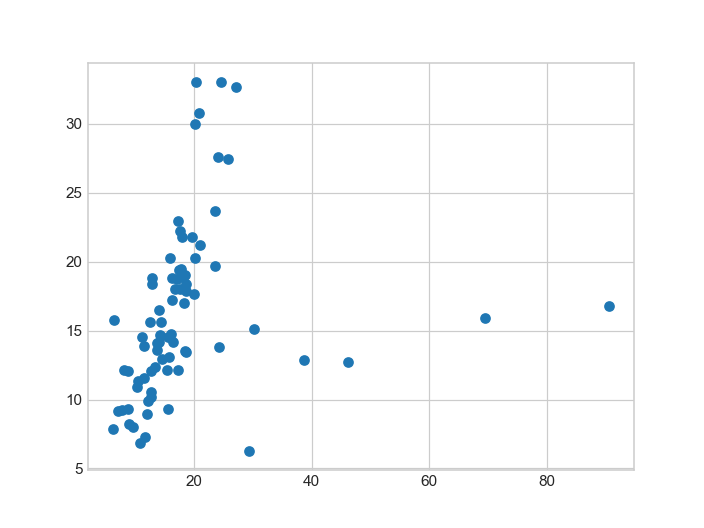

In [50]:
corr_nn_4, r2_nn_4 = get_correlation_and_r2(gt_4, preds_4, mae_avrg_val_f_4)

print(corr_nn_4, r2_nn_4, len(preds_4[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_4, gt_4)
#ca.set_xlim(10, 50)
#ca.set_ylim(5, 45)

In [51]:
model_f = models.Sequential()
model_f.add(layers.Dense(50, activation='relu',
                       input_shape=(5,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(10, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.004, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_7, mae_avrg_f_7, mae_avrg_val_f_7, gt_7, preds_7 = evaluate_model(model_f, 
                                                                          patients_xy[7]['x'], 
                                                                          patients_xy[7]['y'], 
                                                                          splitter, 1000)

KeyboardInterrupt: 

          0         0
0  1.000000  0.544186
0  0.544186  1.000000 0.286567363226349 176


<IPython.core.display.Javascript object>


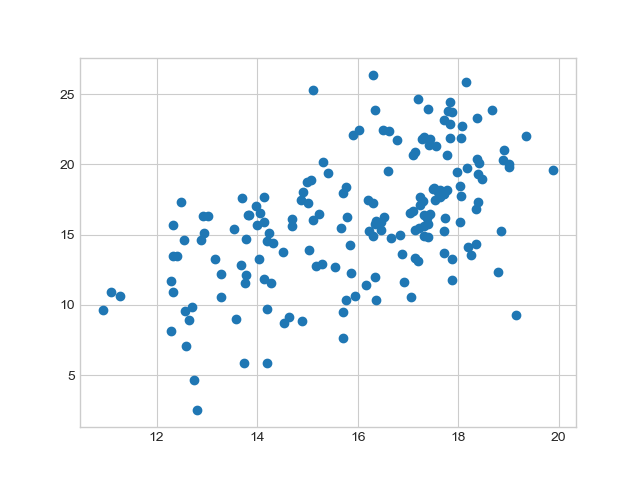

In [133]:
corr_nn_7, r2_nn_7 = get_correlation_and_r2(gt_7, preds_7, mae_avrg_val_f_7)

print(corr_nn_7, r2_nn_7, len(preds_7[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_7, gt_7)
#ca.set_xlim(10, 50)
#ca.set_ylim(5, 45)

In [139]:
model_f = models.Sequential()
model_f.add(layers.Dense(50, activation='relu',
                       input_shape=(5,)))
model_f.add(layers.Dropout(0.1))
model_f.add(layers.Dense(10, activation='relu'))
model_f.add(layers.Dense(1))

optimizer = optimizers.Adagrad(lr=0.004, epsilon=None, decay=0.0)
model_f.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

splitter = ShuffleSplit(n_splits=1)
model_f_6, mae_avrg_f_6, mae_avrg_val_f_6, gt_6, preds_6 = evaluate_model(model_f, 
                                                                          patients_xy[6]['x'], 
                                                                          patients_xy[6]['y'], 
                                                                          splitter, 1000)

Train data shape:(164, 5), Test data shape:(69, 5)
Train on 164 samples, validate on 69 samples
Epoch 1/1000
164/164 [==============================] - 1s 6ms/step - loss: 106.3447 - mean_absolute_error: 9.0166 - val_loss: 95.7338 - val_mean_absolute_error: 8.1120
Epoch 2/1000
164/164 [==============================] - 0s 3ms/step - loss: 95.9728 - mean_absolute_error: 8.4760 - val_loss: 86.2823 - val_mean_absolute_error: 7.5670
Epoch 3/1000
164/164 [==============================] - 0s 2ms/step - loss: 86.5469 - mean_absolute_error: 7.9510 - val_loss: 78.2644 - val_mean_absolute_error: 7.0635
Epoch 4/1000
164/164 [==============================] - 0s 1ms/step - loss: 77.3412 - mean_absolute_error: 7.4392 - val_loss: 70.7141 - val_mean_absolute_error: 6.5697
Epoch 5/1000
164/164 [==============================] - 0s 2ms/step - loss: 69.5250 - mean_absolute_error: 6.9349 - val_loss: 63.8170 - val_mean_absolute_error: 6.0913
Epoch 6/1000
164/164 [==============================] - 0s 1ms/

Epoch 49/1000
164/164 [==============================] - 0s 1ms/step - loss: 19.7732 - mean_absolute_error: 3.4193 - val_loss: 26.1169 - val_mean_absolute_error: 3.8289
Epoch 50/1000
164/164 [==============================] - 0s 1ms/step - loss: 20.2488 - mean_absolute_error: 3.4674 - val_loss: 26.0672 - val_mean_absolute_error: 3.8269
Epoch 51/1000
164/164 [==============================] - 0s 1ms/step - loss: 20.4785 - mean_absolute_error: 3.5249 - val_loss: 26.0210 - val_mean_absolute_error: 3.8242
Epoch 52/1000
164/164 [==============================] - 0s 1ms/step - loss: 21.6875 - mean_absolute_error: 3.5737 - val_loss: 25.9831 - val_mean_absolute_error: 3.8223
Epoch 53/1000
164/164 [==============================] - 0s 2ms/step - loss: 20.4176 - mean_absolute_error: 3.5385 - val_loss: 25.9490 - val_mean_absolute_error: 3.8205
Epoch 54/1000
164/164 [==============================] - 0s 2ms/step - loss: 20.6024 - mean_absolute_error: 3.5406 - val_loss: 25.9089 - val_mean_absolute_

164/164 [==============================] - 0s 2ms/step - loss: 18.5452 - mean_absolute_error: 3.3724 - val_loss: 24.4175 - val_mean_absolute_error: 3.7438
Epoch 146/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.7812 - mean_absolute_error: 3.4150 - val_loss: 24.4060 - val_mean_absolute_error: 3.7432
Epoch 147/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.2151 - mean_absolute_error: 3.4437 - val_loss: 24.3955 - val_mean_absolute_error: 3.7430
Epoch 148/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.7695 - mean_absolute_error: 3.4504 - val_loss: 24.3911 - val_mean_absolute_error: 3.7430
Epoch 149/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.3123 - mean_absolute_error: 3.5042 - val_loss: 24.3802 - val_mean_absolute_error: 3.7422
Epoch 150/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.2421 - mean_absolute_error: 3.4131 - val_loss: 24.3690 - val_mean_absolute_error: 3.

Epoch 193/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.0126 - mean_absolute_error: 3.3087 - val_loss: 24.1410 - val_mean_absolute_error: 3.7367
Epoch 194/1000
164/164 [==============================] - 0s 3ms/step - loss: 18.2457 - mean_absolute_error: 3.3954 - val_loss: 24.1424 - val_mean_absolute_error: 3.7373
Epoch 195/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.6487 - mean_absolute_error: 3.4062 - val_loss: 24.1340 - val_mean_absolute_error: 3.7366
Epoch 196/1000
164/164 [==============================] - 0s 3ms/step - loss: 18.7774 - mean_absolute_error: 3.4595 - val_loss: 24.1296 - val_mean_absolute_error: 3.7362
Epoch 197/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.2791 - mean_absolute_error: 3.4676 - val_loss: 24.1205 - val_mean_absolute_error: 3.7357
Epoch 198/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.3036 - mean_absolute_error: 3.3813 - val_loss: 24.1173 - val_mean_abs

164/164 [==============================] - 0s 2ms/step - loss: 18.0073 - mean_absolute_error: 3.3690 - val_loss: 23.7464 - val_mean_absolute_error: 3.7244
Epoch 290/1000
164/164 [==============================] - 0s 3ms/step - loss: 18.3825 - mean_absolute_error: 3.4457 - val_loss: 23.7412 - val_mean_absolute_error: 3.7238
Epoch 291/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.8034 - mean_absolute_error: 3.4125 - val_loss: 23.7331 - val_mean_absolute_error: 3.7236
Epoch 292/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.0396 - mean_absolute_error: 3.3931 - val_loss: 23.7285 - val_mean_absolute_error: 3.7236
Epoch 293/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1029 - mean_absolute_error: 3.3377 - val_loss: 23.7204 - val_mean_absolute_error: 3.7232
Epoch 294/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.3556 - mean_absolute_error: 3.3535 - val_loss: 23.7167 - val_mean_absolute_error: 3.

164/164 [==============================] - 0s 1ms/step - loss: 18.6698 - mean_absolute_error: 3.3886 - val_loss: 23.5728 - val_mean_absolute_error: 3.7174
Epoch 386/1000
164/164 [==============================] - 0s 1ms/step - loss: 17.6697 - mean_absolute_error: 3.2798 - val_loss: 23.5701 - val_mean_absolute_error: 3.7174
Epoch 387/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.8024 - mean_absolute_error: 3.4502 - val_loss: 23.5665 - val_mean_absolute_error: 3.7172
Epoch 388/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1342 - mean_absolute_error: 3.3376 - val_loss: 23.5659 - val_mean_absolute_error: 3.7173
Epoch 389/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.2194 - mean_absolute_error: 3.3495 - val_loss: 23.5646 - val_mean_absolute_error: 3.7174
Epoch 390/1000
164/164 [==============================] - 0s 1ms/step - loss: 17.6722 - mean_absolute_error: 3.3222 - val_loss: 23.5637 - val_mean_absolute_error: 3.

164/164 [==============================] - 0s 2ms/step - loss: 18.0807 - mean_absolute_error: 3.3205 - val_loss: 23.5230 - val_mean_absolute_error: 3.7190
Epoch 482/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.6292 - mean_absolute_error: 3.3933 - val_loss: 23.5193 - val_mean_absolute_error: 3.7187
Epoch 483/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2958 - mean_absolute_error: 3.4244 - val_loss: 23.5187 - val_mean_absolute_error: 3.7188
Epoch 484/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.4708 - mean_absolute_error: 3.2899 - val_loss: 23.5171 - val_mean_absolute_error: 3.7187
Epoch 485/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.8930 - mean_absolute_error: 3.3691 - val_loss: 23.5141 - val_mean_absolute_error: 3.7183
Epoch 486/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.8380 - mean_absolute_error: 3.3319 - val_loss: 23.5144 - val_mean_absolute_error: 3.

Epoch 577/1000
164/164 [==============================] - 0s 3ms/step - loss: 17.6642 - mean_absolute_error: 3.3359 - val_loss: 23.4748 - val_mean_absolute_error: 3.7179
Epoch 578/1000
164/164 [==============================] - 0s 3ms/step - loss: 17.6676 - mean_absolute_error: 3.3287 - val_loss: 23.4693 - val_mean_absolute_error: 3.7175
Epoch 579/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.7587 - mean_absolute_error: 3.3136 - val_loss: 23.4675 - val_mean_absolute_error: 3.7173
Epoch 580/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1565 - mean_absolute_error: 3.3673 - val_loss: 23.4703 - val_mean_absolute_error: 3.7176
Epoch 581/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.6719 - mean_absolute_error: 3.3820 - val_loss: 23.4672 - val_mean_absolute_error: 3.7175
Epoch 582/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.8787 - mean_absolute_error: 3.4189 - val_loss: 23.4658 - val_mean_abs

Epoch 673/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.3575 - mean_absolute_error: 3.3618 - val_loss: 23.4358 - val_mean_absolute_error: 3.7175
Epoch 674/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.7433 - mean_absolute_error: 3.3451 - val_loss: 23.4320 - val_mean_absolute_error: 3.7170
Epoch 675/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.6828 - mean_absolute_error: 3.3530 - val_loss: 23.4318 - val_mean_absolute_error: 3.7172
Epoch 676/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2109 - mean_absolute_error: 3.3357 - val_loss: 23.4339 - val_mean_absolute_error: 3.7177
Epoch 677/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.4623 - mean_absolute_error: 3.3878 - val_loss: 23.4329 - val_mean_absolute_error: 3.7175
Epoch 678/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2951 - mean_absolute_error: 3.3276 - val_loss: 23.4325 - val_mean_abs

164/164 [==============================] - 0s 2ms/step - loss: 18.1446 - mean_absolute_error: 3.3870 - val_loss: 23.4302 - val_mean_absolute_error: 3.7161
Epoch 770/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.5309 - mean_absolute_error: 3.4211 - val_loss: 23.4320 - val_mean_absolute_error: 3.7164
Epoch 771/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.3243 - mean_absolute_error: 3.3948 - val_loss: 23.4298 - val_mean_absolute_error: 3.7163
Epoch 772/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.3346 - mean_absolute_error: 3.3849 - val_loss: 23.4300 - val_mean_absolute_error: 3.7163
Epoch 773/1000
164/164 [==============================] - 0s 1ms/step - loss: 18.2061 - mean_absolute_error: 3.3558 - val_loss: 23.4284 - val_mean_absolute_error: 3.7161
Epoch 774/1000
164/164 [==============================] - 0s 1ms/step - loss: 17.9765 - mean_absolute_error: 3.3499 - val_loss: 23.4303 - val_mean_absolute_error: 3.

164/164 [==============================] - 0s 2ms/step - loss: 18.1540 - mean_absolute_error: 3.3413 - val_loss: 23.4165 - val_mean_absolute_error: 3.7167
Epoch 866/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1239 - mean_absolute_error: 3.3464 - val_loss: 23.4183 - val_mean_absolute_error: 3.7170
Epoch 867/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2654 - mean_absolute_error: 3.3327 - val_loss: 23.4173 - val_mean_absolute_error: 3.7170
Epoch 868/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.6164 - mean_absolute_error: 3.3140 - val_loss: 23.4172 - val_mean_absolute_error: 3.7172
Epoch 869/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.3470 - mean_absolute_error: 3.2871 - val_loss: 23.4145 - val_mean_absolute_error: 3.7169
Epoch 870/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.0658 - mean_absolute_error: 3.4493 - val_loss: 23.4144 - val_mean_absolute_error: 3.

Epoch 961/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.5576 - mean_absolute_error: 3.3359 - val_loss: 23.4159 - val_mean_absolute_error: 3.7204
Epoch 962/1000
164/164 [==============================] - 0s 2ms/step - loss: 19.1786 - mean_absolute_error: 3.4100 - val_loss: 23.4154 - val_mean_absolute_error: 3.7202
Epoch 963/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.2707 - mean_absolute_error: 3.3809 - val_loss: 23.4121 - val_mean_absolute_error: 3.7201
Epoch 964/1000
164/164 [==============================] - 0s 2ms/step - loss: 18.1800 - mean_absolute_error: 3.3773 - val_loss: 23.4068 - val_mean_absolute_error: 3.7192
Epoch 965/1000
164/164 [==============================] - 0s 2ms/step - loss: 17.2079 - mean_absolute_error: 3.2924 - val_loss: 23.4073 - val_mean_absolute_error: 3.7192
Epoch 966/1000
164/164 [==============================] - 0s 3ms/step - loss: 17.8725 - mean_absolute_error: 3.3294 - val_loss: 23.4064 - val_mean_abs

          0         0
0  1.000000  0.469512
0  0.469512  1.000000 0.21405108616189905 69


<IPython.core.display.Javascript object>


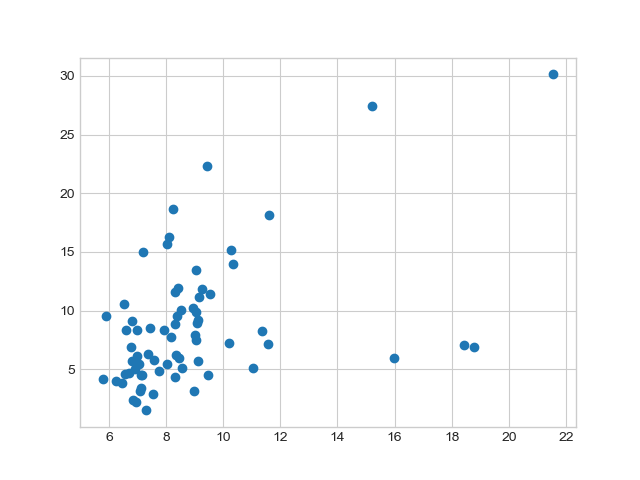

In [141]:
corr_nn_6, r2_nn_6 = get_correlation_and_r2(gt_6, preds_6, mae_avrg_val_f_6)

print(corr_nn_6, r2_nn_6, len(preds_6[0]))

plt.figure()
ca = plt.gca()
ca.scatter(preds_6, gt_6)
#ca.set_xlim(10, 50)

#ca.set_ylim(5, 45)

<IPython.core.display.Javascript object>


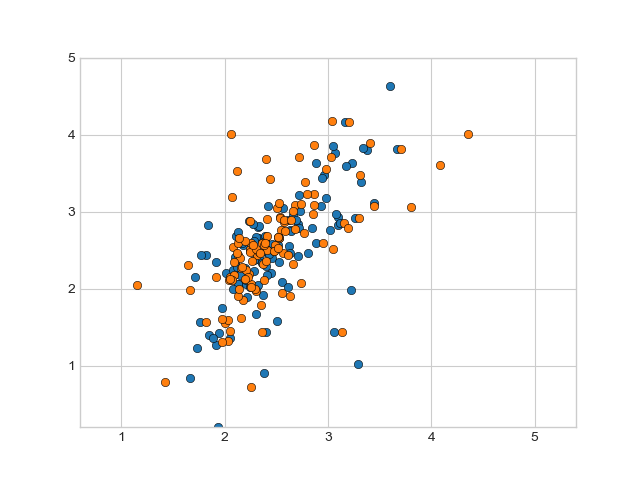

(0.2, 5.0)

In [142]:
less_mae_idx = np.argmin(mae_1)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_1)/10, np.array(gt_1)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_1[less_mae_idx]/10, ground_truth_1[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.6, 5.4)
ca.set_ylim(0.2, 5.0)

<IPython.core.display.Javascript object>


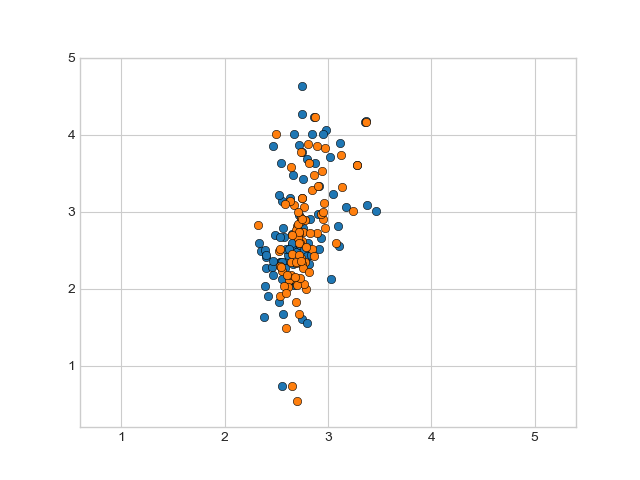

(0.2, 5.0)

In [382]:
less_mae_idx = np.argmin(mae_1)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_1)/10, np.array(gt_1)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_1[less_mae_idx]/10, ground_truth_1[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.6, 5.4)
ca.set_ylim(0.2, 5.0)

<IPython.core.display.Javascript object>


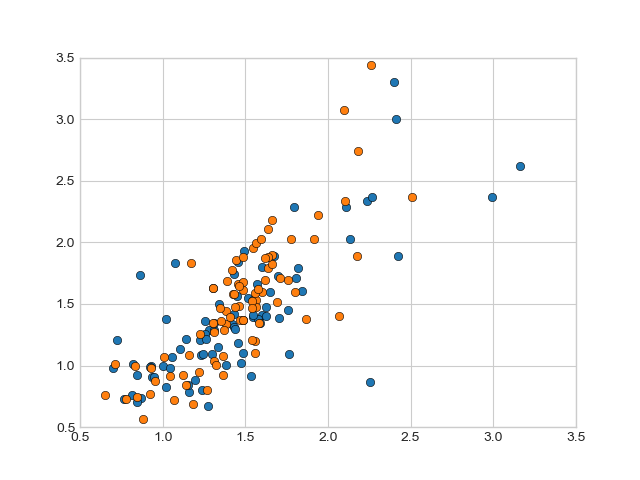

(0.5, 3.5)

In [143]:
less_mae_idx = np.argmin(mae_4)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_4)/10, np.array(gt_4)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_4[less_mae_idx]/10, ground_truth_4[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.5, 3.5)
ca.set_ylim(0.5, 3.5)

<IPython.core.display.Javascript object>


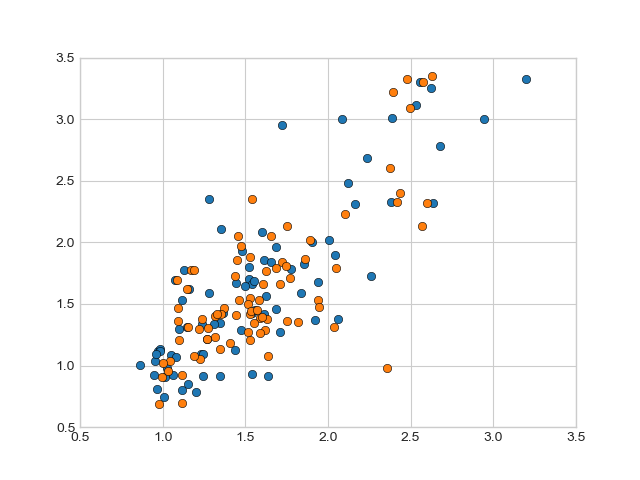

(0.5, 3.5)

In [386]:
less_mae_idx = np.argmin(mae_4)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_4)/10, np.array(gt_4)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_4[less_mae_idx]/10, ground_truth_4[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.5, 3.5)
ca.set_ylim(0.5, 3.5)

<IPython.core.display.Javascript object>


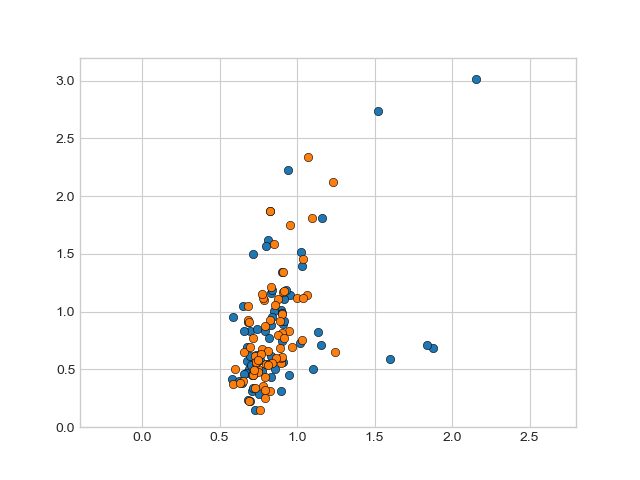

(0, 3.2)

In [144]:
less_mae_idx = np.argmin(mae_6)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_6)/10, np.array(gt_6)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_6[less_mae_idx]/10, ground_truth_6[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(-0.4, 2.8)
ca.set_ylim(0, 3.2)

<IPython.core.display.Javascript object>


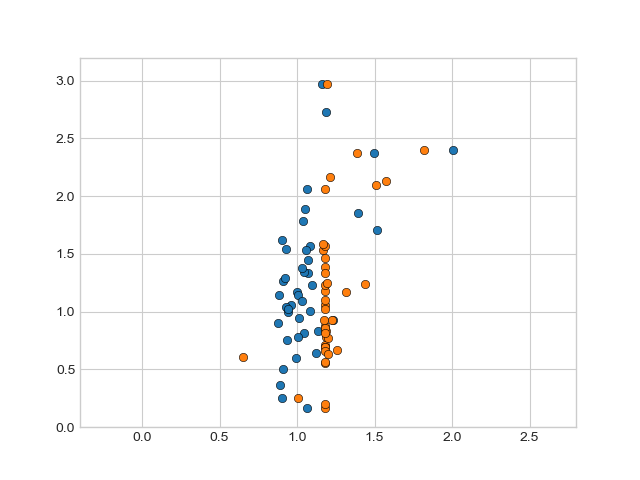

(0, 3.2)

In [393]:
less_mae_idx = np.argmin(mae_6)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_6)/10, np.array(gt_6)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_6[less_mae_idx]/10, ground_truth_6[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(-0.4, 2.8)
ca.set_ylim(0, 3.2)

<IPython.core.display.Javascript object>


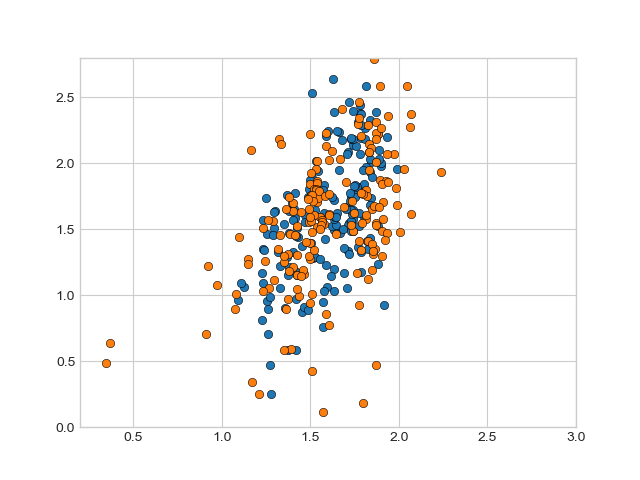

(0, 2.8)

In [145]:
less_mae_idx = np.argmin(mae_7)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_7)/10, np.array(gt_7)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_7[less_mae_idx]/10, ground_truth_7[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.2, 3)
ca.set_ylim(0, 2.8)

<IPython.core.display.Javascript object>


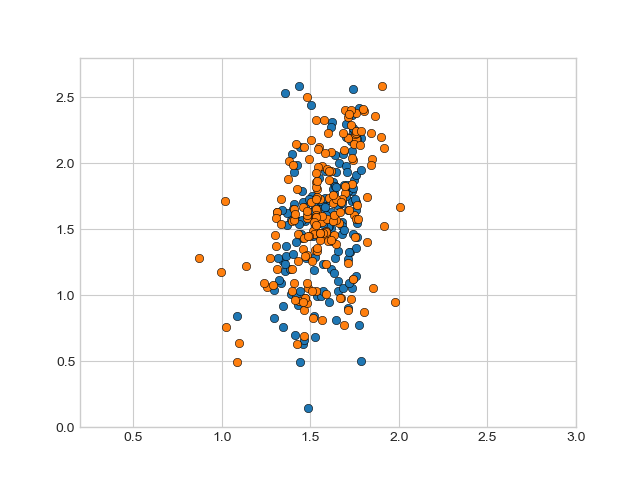

(0, 2.8)

In [397]:
less_mae_idx = np.argmin(mae_7)

plt.figure()
ca = plt.gca()
ca.scatter(np.array(preds_7)/10, np.array(gt_7)/10, edgecolors='k', linewidths=0.4)
ca.scatter(pred_7[less_mae_idx]/10, ground_truth_7[less_mae_idx]/10, edgecolors='k', linewidths=0.4)
ca.set_xlim(0.2, 3)
ca.set_ylim(0, 2.8)

In [363]:
len(preds_1[0]), len(pred_1[0])

(85, 85)